In [62]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate
from useful_functions import *
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# **Reading Data**

In [63]:
#read data from csv
df = pd.read_csv("dataset.csv")

In [64]:
#get to know the data
print(df.head())
print(df.shape)

   Unnamed: 0  hemoglobin  hearing(right)  dental caries  fasting blood sugar  \
0           0        16.5               1              0                   94   
1           1        16.2               2              1                  147   
2           2        17.4               1              0                   79   
3           3        15.9               1              1                   91   
4           4        15.4               1              0                   91   

   LDL  height(cm)  weight(kg)  Cholesterol  serum creatinine  Gtp  smoking  
0   75         165          60          172               1.0   27        1  
1  126         165          65          194               1.1   37        0  
2   93         170          75          178               0.8   53        1  
3  102         180          95          180               1.0   30        0  
4   93         165          60          155               0.8   17        1  
(159256, 12)


##### **Splitting the data into train, validation, and test sets**
In this section, we are splitting the data into three parts: train, test, and validation with 80%, 10%, and 10%, respectively.

In [65]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (127404, 12)
Validation set shape: (15926, 12)
Test set shape: (15926, 12)


# **Data Exploration: Univariate Analysis**

### **Feature 1: hemoglobin**

Observations: 

1- The distribution for hemoglobin is almost gaussian, but is skewed to the left

2- Hemoglobin for smokers is on average higher than for non smokers.

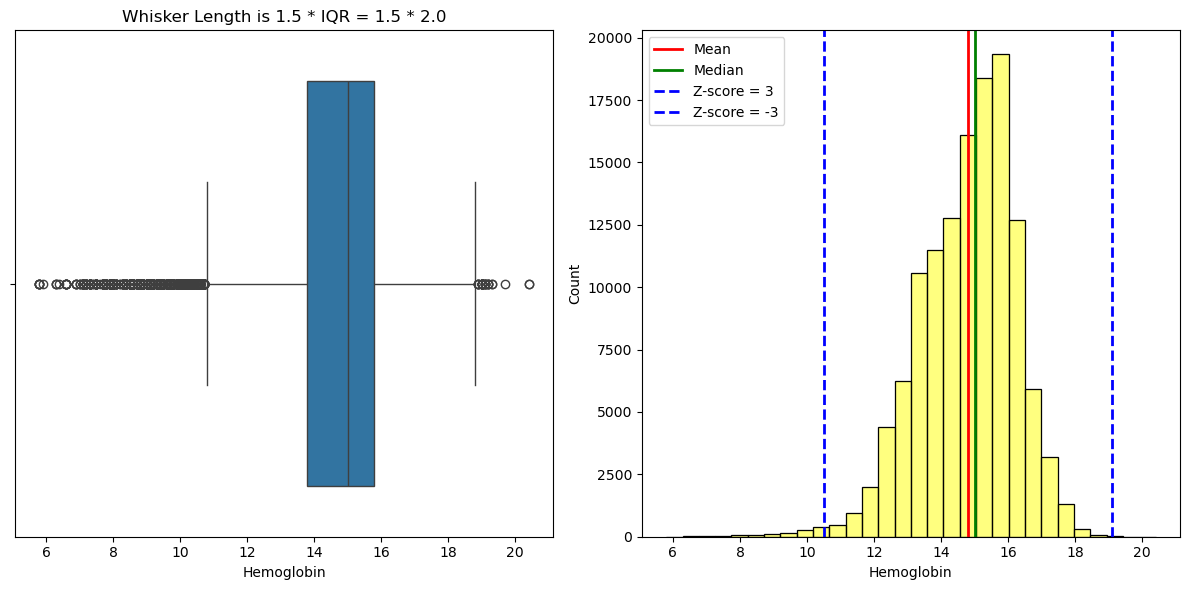

+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |  14.793 |
+--------------------+---------+
| Median             |  15     |
+--------------------+---------+
| Max Value          |  20.4   |
+--------------------+---------+
| Min Value          |   5.8   |
+--------------------+---------+
| Range              |  14.6   |
+--------------------+---------+
| Standard Deviation |   1.432 |
+--------------------+---------+
| Skew               |  -0.637 |
+--------------------+---------+
| IQR                |   2     |
+--------------------+---------+


In [27]:
# Analyzing Hemoglobin Feature without information about the target
hemoglobin_feature = train_df["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

# Create subplots with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature, ax=ax1)
ax1.set_xlabel('Hemoglobin')
ax1.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow", ax=ax2)
ax2.set_xlabel('Hemoglobin')
ax2.set_ylabel('Count')
ax2.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
ax2.axvline(hemoglobin_median, c='green', ls='-', lw=2)
ax2.axvline(z_score_positive3, c='blue', ls='--', lw=2)
ax2.axvline(z_score_negative3, c='blue', ls='--', lw=2)
ax2.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Tabulate the statistics
table = [
    ["Mean", round(hemoglobin_mean, 3)],
    ["Median", round(hemoglobin_median, 3)],
    ["Max Value", round(hemoglobin_max_val, 3)],
    ["Min Value", round(hemoglobin_min_val, 3)],
    ["Range", round(hemoglobin_range, 3)],
    ["Standard Deviation", round(hemoglobin_std, 3)],
    ["Skew", round(hemoglobin_skew, 3)],
    ["IQR", round(hemoglobin_iqr, 3)]
]

print(tabulate(table, headers=["Statistic", "Value"], tablefmt="grid"))



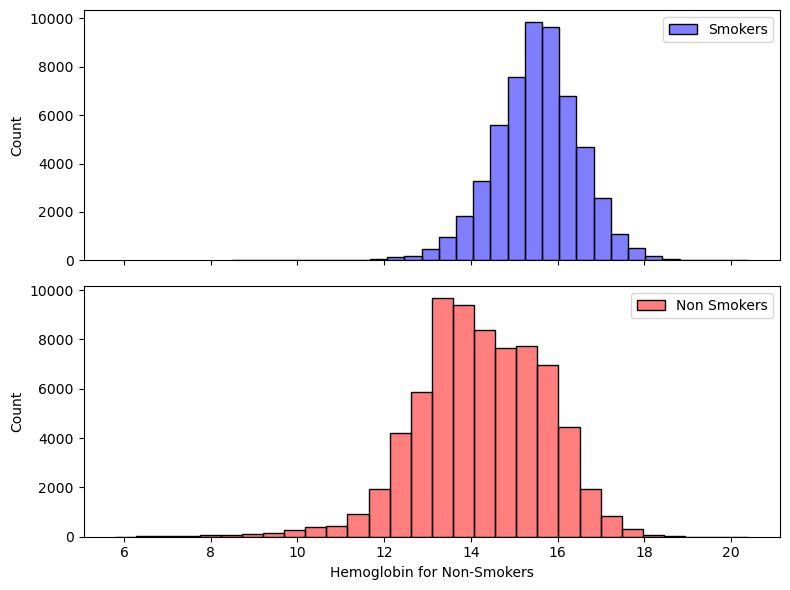

In [28]:
hemoglobin_smokers = train_df[train_df['smoking'] == 1]['hemoglobin']
hemoglobin_nonsmokers = train_df[train_df['smoking'] == 0]['hemoglobin']

# Creating subplots with two histograms stacked vertically for 'Hemoglobin' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=hemoglobin_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('Hemoglobin for Smokers')
ax1.legend()

sns.histplot(data=hemoglobin_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Hemoglobin for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Feature 3: Dental Carries**

Observations:
1- Most Individuals Don't Have Dental Carries

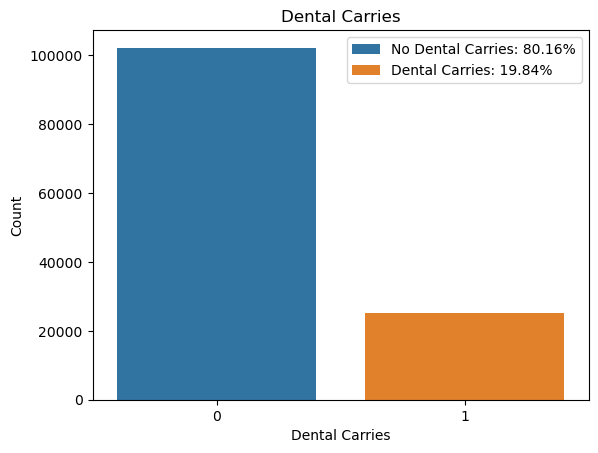

In [29]:
# Analyzing Dental Carries Feature without information about the target
num_samples = len(train_df)
dental_feature = train_df[["dental caries"]]
dental_carries_percentage = 100 * len(train_df[train_df["dental caries"]==1]) / num_samples
no_dental_carries_percentage = 100 * len(train_df[train_df["dental caries"]== 0]) / num_samples



# Histogram for Dental Carries Feature
sns.countplot(x="dental caries", data=train_df, hue="dental caries")
plt.xlabel('Dental Carries')
plt.ylabel('Count')
plt.title('Dental Carries')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage,2)}%',  f"Dental Carries: {round(dental_carries_percentage,2)}%"])
plt.show()


### **Feature 4: Fasting Blood Sugar**
Observations:

1- Fasting Blood Sugar is skewed to the right with some outliers.

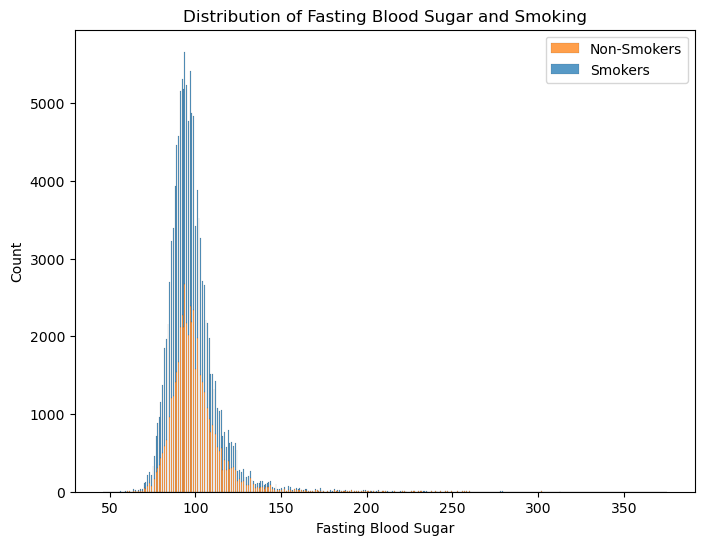

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x="fasting blood sugar", hue="smoking", multiple="stack")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()


### **Feature 5: LDL**

Observation: 

1- Upon analyzing the data, it's evident that LDL exhibits a significant skewness in its distribution.

2- Data Resembles a Gaussian Distribution after removing outliers with LDL > 500.

+--------------------+----------+
| Statistic          |    Value |
+====================+==========+
| Mean               |  114.625 |
+--------------------+----------+
| Median             |  114     |
+--------------------+----------+
| Max Value          | 1860     |
+--------------------+----------+
| Min Value          |    1     |
+--------------------+----------+
| Range              | 1859     |
+--------------------+----------+
| Standard Deviation |   28.536 |
+--------------------+----------+
| Skew               |    7.89  |
+--------------------+----------+
| IQR                |   38     |
+--------------------+----------+


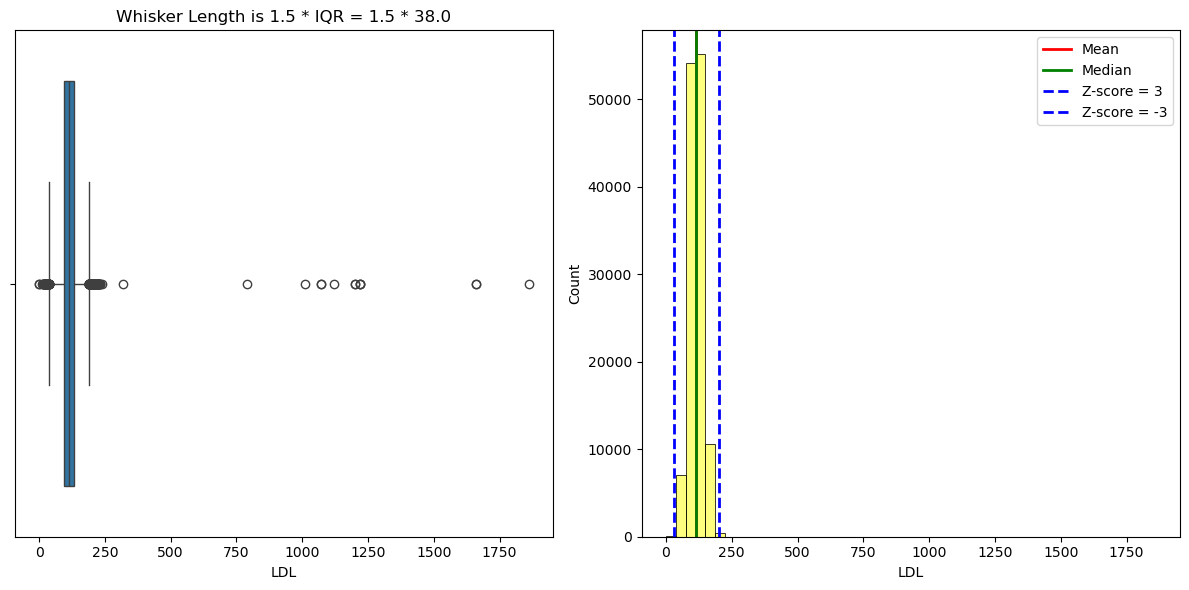

In [31]:
# Analyzing LDL Feature without information about the target
LDL_feature = train_df["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

# Define the statistics
statistics = [
    ["Mean", round(LDL_mean, 3)],
    ["Median", round(LDL_median, 3)],
    ["Max Value", round(LDL_max_val, 3)],
    ["Min Value", round(LDL_min_val, 3)],
    ["Range", round(LDL_range, 3)],
    ["Standard Deviation", round(LDL_std, 3)],
    ["Skew", round(LDL_skew, 3)],
    ["IQR", round(LDL_iqr, 3)]
]

# Tabulate the statistics
table = tabulate(statistics, headers=["Statistic", "Value"], tablefmt="grid")

# Print the table
print(table)

# Create subplots for Box Plot and Histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature, ax=axes[0])
axes[0].set_xlabel('LDL')
axes[0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow", ax=axes[1])
axes[1].set_xlabel('LDL')
axes[1].set_ylabel('Count')
axes[1].axvline(LDL_mean, c='red', ls='-', lw=2)
axes[1].axvline(LDL_median, c='green', ls='-', lw=2)
axes[1].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


LDL:
Mean 114.509
Median 114.0
Max Value 318
Min Value 1
Range 317
Standard Deviation 25.953
Skew 0.132
IQR 38.0
Z-score = 3 192.36928623911706, Z-score = -3 36.648446567753126


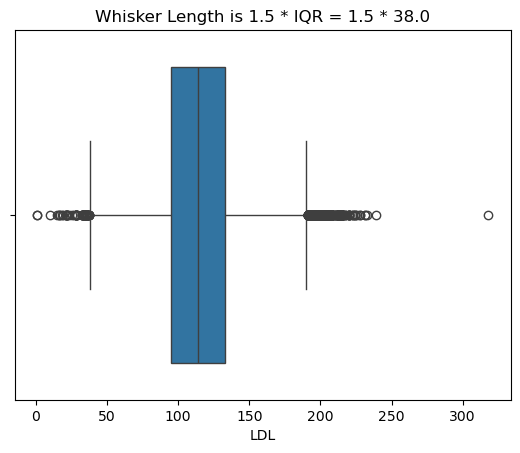

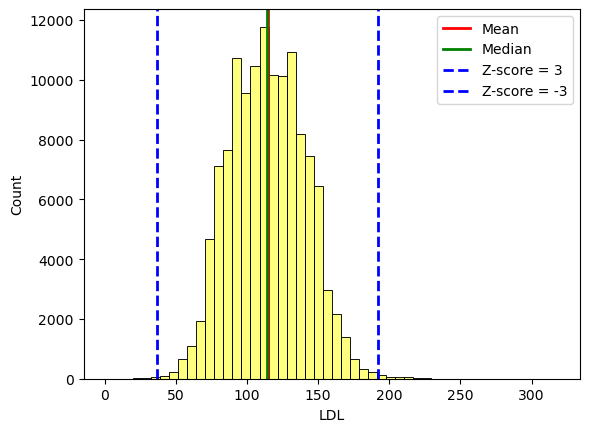

In [32]:
#Analysis After Removing Outliers

# Analyzing LDL Feature without information about the target
LDL_feature = train_df[train_df["LDL"] < 500]["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

print("LDL:")
print(f"Mean {round(LDL_mean, 3)}")
print(f"Median {round(LDL_median, 3)}")
print(f"Max Value {round(LDL_max_val, 3)}")
print(f"Min Value {round(LDL_min_val, 3)}")
print(f"Range {round(LDL_range, 3)}")
print(f"Standard Deviation {round(LDL_std, 3)}")
print(f"Skew {round(LDL_skew, 3)}")
print(f"IQR {round(LDL_iqr, 3)}")
print(f"Z-score = 3 {z_score_positive3}, Z-score = -3 {z_score_negative3}")


# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature)
plt.xlabel('LDL')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")
plt.show()

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow")
plt.xlabel('LDL')
plt.ylabel('Count')
plt.axvline(LDL_mean, c='red', ls='-', lw=2)
plt.axvline(LDL_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

### **Feature 6: Height**
Observations:

1- Smokers are relatively taller than non-smokers

In [33]:


# Analyzing Height Feature for Smokers
height_smokers = train_df[train_df["smoking"] == 1][["height(cm)"]]
height_smokers_percentage = 100 * len(height_smokers[height_smokers["height(cm)"] > 160]) / len(height_smokers)
height_nonsmokers = train_df[train_df["smoking"] == 0][["height(cm)"]]
height_nonsmokers_percentage = 100 * len(height_nonsmokers[height_nonsmokers["height(cm)"] > 160]) / len(height_nonsmokers)

# Central Tendency Measures
height_smokers_mean = height_smokers.mean()
height_smokers_median = height_smokers.median()
height_nonsmokers_mean = height_nonsmokers.mean()
height_nonsmokers_median = height_nonsmokers.median()

# Measures of Dispersion
height_smokers_max_val = height_smokers.max()
height_smokers_min_val = height_smokers.min()
height_smokers_range = height_smokers_max_val - height_smokers_min_val
height_smokers_std = height_smokers.std()
height_smokers_skew = height_smokers.skew()
height_smokers_iqr = height_smokers.quantile(0.75) - height_smokers.quantile(0.25)
height_nonsmokers_max_val = height_nonsmokers.max()
height_nonsmokers_min_val = height_nonsmokers.min()
height_nonsmokers_range = height_nonsmokers_max_val - height_nonsmokers_min_val
height_nonsmokers_std = height_nonsmokers.std()
height_nonsmokers_skew = height_nonsmokers.skew()
height_nonsmokers_iqr = height_nonsmokers.quantile(0.75) - height_nonsmokers.quantile(0.25)

# Create table data
table_data = [
    ["", "Smokers", "Non-Smokers"],
    ["Mean", round(height_smokers_mean[0], 3), round(height_nonsmokers_mean[0], 3)],
    ["Median", round(height_smokers_median[0], 3), round(height_nonsmokers_median[0], 3)],
    ["Max Value", round(height_smokers_max_val[0], 3), round(height_nonsmokers_max_val[0], 3)],
    ["Min Value", round(height_smokers_min_val[0], 3), round(height_nonsmokers_min_val[0], 3)],
    ["Range", round(height_smokers_range[0], 3), round(height_nonsmokers_range[0], 3)],
    ["Standard Deviation", round(height_smokers_std[0], 3), round(height_nonsmokers_std[0], 3)],
    ["Skew", round(height_smokers_skew[0], 3), round(height_nonsmokers_skew[0], 3)],
    ["IQR", round(height_smokers_iqr[0], 3), round(height_nonsmokers_iqr[0], 3)]
]

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

# Set table alignment
table.align = "c"

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Height For Smokers
sns.countplot(x="height(cm)", data=height_smokers, hue="height(cm)", ax=ax1)
ax1.set_xlabel('Height')
ax1.set_ylabel('Count')
ax1.set_title('Height (Smokers)')
ax1.legend(labels=["< 160", "> 160"])

# Histogram for Height For Non-Smokers
sns.countplot(x="height(cm)", data=height_nonsmokers, hue="height(cm)", ax=ax2)
ax2.set_xlabel('Height')
ax2.set_ylabel('Count')
ax2.set_title('Height (Non-Smokers)')
ax2.legend(labels=["< 160", "> 160"])


plt.tight_layout()
plt.show()


╒════════════════════╤═══════════╤═══════════════╕
│                    │   Smokers │   Non-Smokers │
╞════════════════════╪═══════════╪═══════════════╡
│ Mean               │   169.742 │       161.793 │
├────────────────────┼───────────┼───────────────┤
│ Median             │   170     │       160     │
├────────────────────┼───────────┼───────────────┤
│ Max Value          │   190     │       190     │
├────────────────────┼───────────┼───────────────┤
│ Min Value          │   135     │       135     │
├────────────────────┼───────────┼───────────────┤
│ Range              │    55     │        55     │
├────────────────────┼───────────┼───────────────┤
│ Standard Deviation │     6.15  │         9.014 │
├────────────────────┼───────────┼───────────────┤
│ Skew               │    -0.251 │         0.192 │
├────────────────────┼───────────┼───────────────┤
│ IQR                │    10     │        15     │
╘════════════════════╧═══════════╧═══════════════╛


/tmp/ipykernel_25811/911518981.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Mean", round(height_smokers_mean[0], 3), round(height_nonsmokers_mean[0], 3)],
/tmp/ipykernel_25811/911518981.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Median", round(height_smokers_median[0], 3), round(height_nonsmokers_median[0], 3)],
/tmp/ipykernel_25811/911518981.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Max Value", ro

AttributeError: 'str' object has no attribute 'align'

### **Feature 7: weight**
Observations:

1- The feature is skewed a little bit to the right 

2- Non-smokers' weight is skewed to the right, while smokers' weights are gaussian distributed.

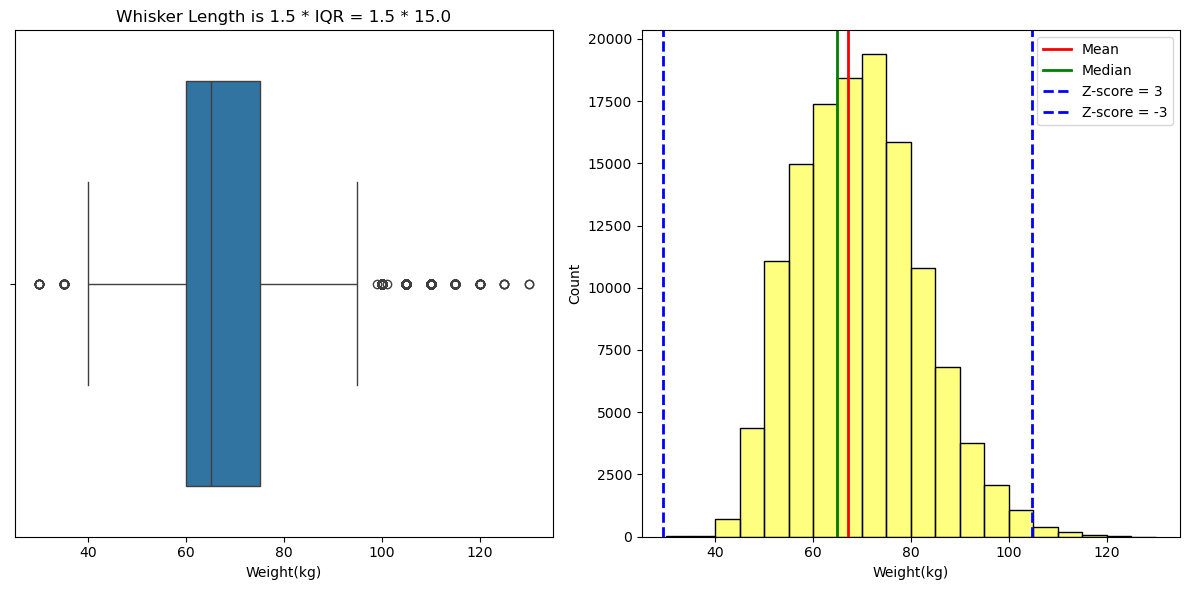

+------------+--------------------+---------+
| Feature    | Measure            |   Value |
+============+====================+=========+
| Weight(kg) | Mean               |  67.109 |
+------------+--------------------+---------+
|            | Median             |  65     |
+------------+--------------------+---------+
|            | Max Value          | 130     |
+------------+--------------------+---------+
|            | Min Value          |  30     |
+------------+--------------------+---------+
|            | Range              | 100     |
+------------+--------------------+---------+
|            | Standard Deviation |  12.565 |
+------------+--------------------+---------+
|            | Skew               |   0.379 |
+------------+--------------------+---------+
|            | IQR                |  15     |
+------------+--------------------+---------+


In [34]:

weight_feature = train_df["weight(kg)"]

# Central Tendency Measures
weight_mean = weight_feature.mean()
weight_median = weight_feature.median()

# Measures of Dispersion
weight_max_val = weight_feature.max()
weight_min_val = weight_feature.min()
weight_range = weight_max_val - weight_min_val
weight_std = weight_feature.std()
weight_skew = weight_feature.skew()
weight_iqr = weight_feature.quantile(0.75) - weight_feature.quantile(0.25)
z_score_positive3 = 3 * weight_std + weight_mean
z_score_negative3 = -3 * weight_std + weight_mean

# Create subplots for box plot and histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Weight(kg) Feature
sns.boxplot(x=weight_feature, ax=axes[0])
axes[0].set_xlabel('Weight(kg)')
axes[0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)}")

# Histogram for Weight(kg) Feature
sns.histplot(weight_feature, bins=20, alpha=0.5, color="yellow", ax=axes[1])
axes[1].set_xlabel('Weight(kg)')
axes[1].set_ylabel('Count')
axes[1].axvline(weight_mean, c='red', ls='-', lw=2)
axes[1].axvline(weight_median, c='green', ls='-', lw=2)
axes[1].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create table data
table_data = [
    ["Weight(kg)", "Mean", round(weight_mean, 3)],
    ["", "Median", round(weight_median, 3)],
    ["", "Max Value", round(weight_max_val, 3)],
    ["", "Min Value", round(weight_min_val, 3)],
    ["", "Range", round(weight_range, 3)],
    ["", "Standard Deviation", round(weight_std, 3)],
    ["", "Skew", round(weight_skew, 3)],
    ["", "IQR", round(weight_iqr, 3)],
]

# Print the table
print(tabulate(table_data, headers=["Feature", "Measure", "Value"], tablefmt="grid"))


Average Weight for Smokers: 72.13 kg
Median Weight for Smokers: 70.00 kg
Average Weight for Non-Smokers: 63.22 kg
Median Weight for Non-Smokers: 60.00 kg


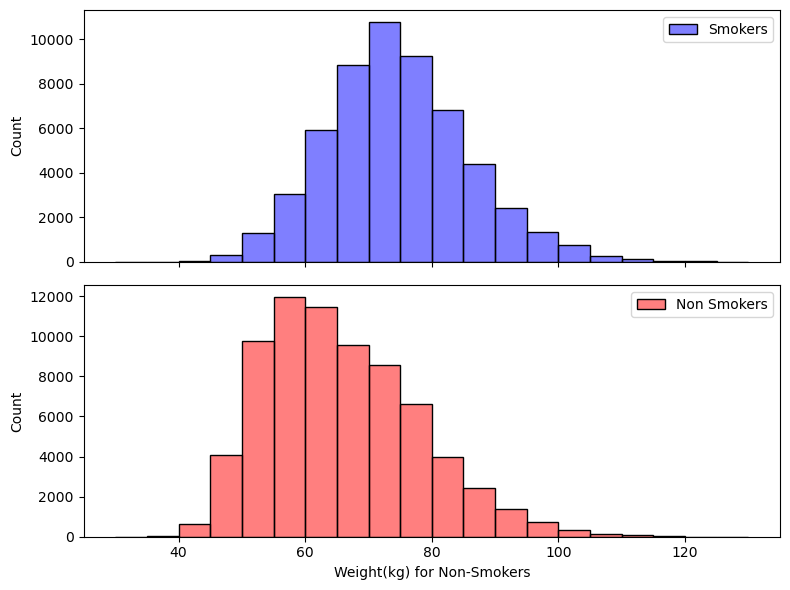

In [35]:
# Separate data for smokers and non-smokers based on 'weight(kg)' levels
weight_smokers = train_df[train_df['smoking'] == 1]['weight(kg)']
weight_nonsmokers = train_df[train_df['smoking'] == 0]['weight(kg)']

# Creating subplots with two histograms stacked vertically for 'Weight(kg)' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

avg_weight_smokers = weight_smokers.mean()
median_smokers = weight_smokers.median()
avg_weight_nonsmokers = weight_nonsmokers.mean()
median_nonsmokers = weight_nonsmokers.median()

# Print average weights
print(f"Average Weight for Smokers: {avg_weight_smokers:.2f} kg")
print(f"Median Weight for Smokers: {median_smokers:.2f} kg")
print(f"Average Weight for Non-Smokers: {avg_weight_nonsmokers:.2f} kg")
print(f"Median Weight for Non-Smokers: {median_nonsmokers:.2f} kg")

sns.histplot(data=weight_smokers, color='blue', alpha=0.5, bins=20, label='Smokers', ax=ax1)
ax1.set_xlabel('Weight(kg) for Smokers')
ax1.legend()

sns.histplot(data=weight_nonsmokers, color='red', alpha=0.5, bins=20, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Weight(kg) for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Feature 9: Serum Creatinine**
Observations:

1- Serum Creatinine has outliers at the right, which means that it is very skewed to the right.

2- By removing the outliers, the distribution becomes normal.

+------------------------------+-----------+
| Statistic                    |     Value |
+==============================+===========+
| Mean                         |  0.892856 |
+------------------------------+-----------+
| Median                       |  0.9      |
+------------------------------+-----------+
| Standard Deviation           |  0.180068 |
+------------------------------+-----------+
| Minimum Value                |  0.1      |
+------------------------------+-----------+
| Maximum Value                |  9.9      |
+------------------------------+-----------+
| IQR                          |  0.2      |
+------------------------------+-----------+
| Skewness                     |  1.83092  |
+------------------------------+-----------+
| Kurtosis                     | 72.3608   |
+------------------------------+-----------+
| Z-score for 3 std above mean |  1.43306  |
+------------------------------+-----------+
| Z-score for 3 std below mean |  0.35265  |
+---------

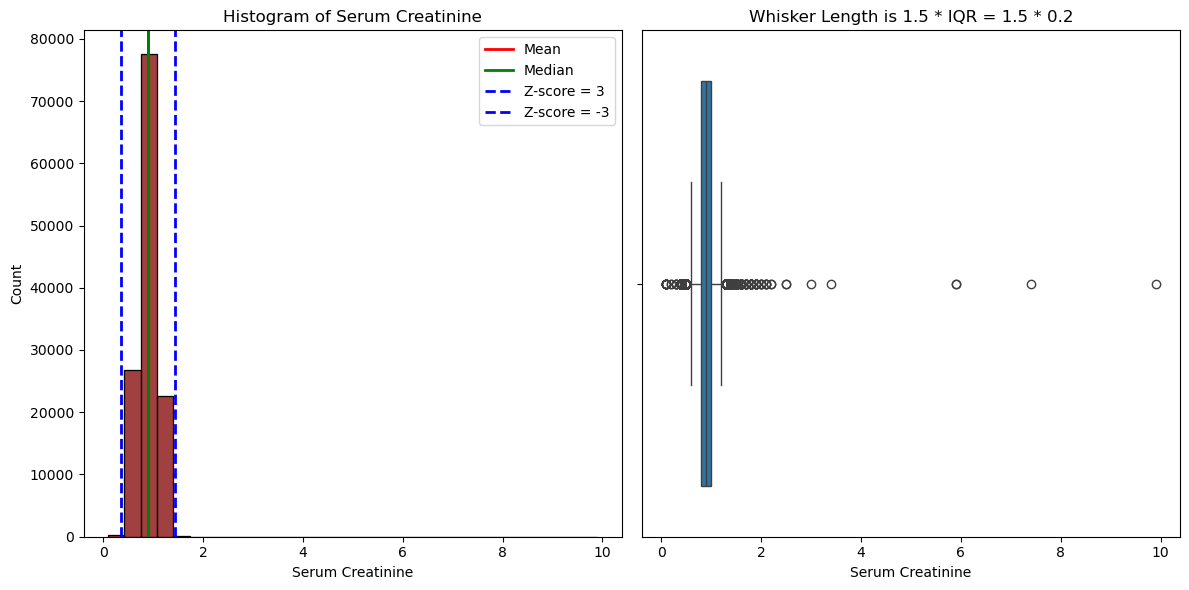

In [36]:

# Descriptive statistics of the serum creatinine feature
serum_creatinine_mean = train_df['serum creatinine'].mean()
serum_creatinine_median = train_df['serum creatinine'].median()
serum_creatinine_std = train_df['serum creatinine'].std()
serum_creatinine_min = train_df['serum creatinine'].min()
serum_creatinine_max = train_df['serum creatinine'].max()
serum_creatinine_iqr = train_df['serum creatinine'].quantile(0.75) - train_df['serum creatinine'].quantile(0.25)
serum_creatinine_skew = train_df['serum creatinine'].skew()
serum_creatinine_kurtosis = train_df['serum creatinine'].kurtosis()
serum_creatinine_z_score_pos3 = 3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_z_score_neg3 = -3 * serum_creatinine_std + serum_creatinine_mean

# Create a list of lists for the tabular data
table_data = [
    ["Mean", serum_creatinine_mean],
    ["Median", serum_creatinine_median],
    ["Standard Deviation", serum_creatinine_std],
    ["Minimum Value", serum_creatinine_min],
    ["Maximum Value", serum_creatinine_max],
    ["IQR", serum_creatinine_iqr],
    ["Skewness", serum_creatinine_skew],
    ["Kurtosis", serum_creatinine_kurtosis],
    ["Z-score for 3 std above mean", serum_creatinine_z_score_pos3],
    ["Z-score for 3 std below mean", serum_creatinine_z_score_neg3]
]

# Print the tabulated data
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of serum creatinine feature
sns.histplot(train_df['serum creatinine'], bins=30, color="maroon", ax=ax1)
ax1.set_xlabel('Serum Creatinine')
ax1.set_ylabel('Count')
ax1.axvline(serum_creatinine_mean, c='red', ls='-', lw=2)
ax1.axvline(serum_creatinine_median, c='green', ls='-', lw=2)
ax1.axvline(serum_creatinine_z_score_pos3, c='blue', ls='--', lw=2)
ax1.axvline(serum_creatinine_z_score_neg3, c='blue', ls='--', lw=2)
ax1.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
ax1.set_title('Histogram of Serum Creatinine')

# Boxplot of serum creatinine feature
sns.boxplot(x=train_df['serum creatinine'], ax=ax2)
ax2.set_xlabel('Serum Creatinine')
ax2.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


+------------------------------+---------+
| Statistic                    |   Value |
+==============================+=========+
| Mean                         |   0.893 |
+------------------------------+---------+
| Median                       |   0.9   |
+------------------------------+---------+
| Standard Deviation           |   0.176 |
+------------------------------+---------+
| IQR                          |   0.2   |
+------------------------------+---------+
| Skew                         |   0.107 |
+------------------------------+---------+
| Kurtosis                     |   0.193 |
+------------------------------+---------+
| Z-score for 3 std above mean |   1.42  |
+------------------------------+---------+
| Z-score for 3 std below mean |   0.365 |
+------------------------------+---------+


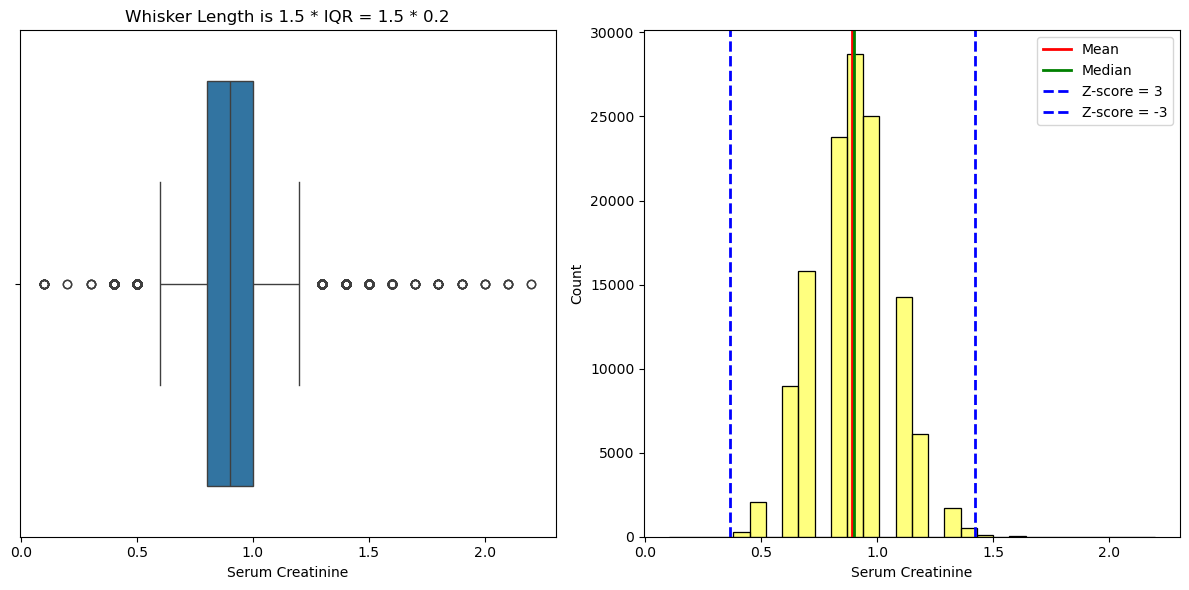

In [37]:
#Analysis after removing the skewed data
serum_creatinine_feature = train_df[train_df['serum creatinine'] < 2.5]['serum creatinine']

# Central Tendency Measures
serum_creatinine_mean = serum_creatinine_feature.mean()
serum_creatinine_median = serum_creatinine_feature.median()
serum_creatinine_iqr = serum_creatinine_feature.quantile(0.75) - serum_creatinine_feature.quantile(0.25)
serum_creatinine_std = serum_creatinine_feature.std()
serum_creatinine_skew = serum_creatinine_feature.skew()
serum_creatinine_kurtosis = serum_creatinine_feature.kurtosis()
serum_creatinine_z_score_pos3 = 3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_z_score_neg3 = -3 * serum_creatinine_std + serum_creatinine_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(serum_creatinine_mean, 3)],
    ["Median", round(serum_creatinine_median, 3)],
    ["Standard Deviation", round(serum_creatinine_std, 3)],
    ["IQR", round(serum_creatinine_iqr, 3)],
    ["Skew", round(serum_creatinine_skew, 3)],
    ["Kurtosis", round(serum_creatinine_kurtosis, 3)],
    ["Z-score for 3 std above mean", round(serum_creatinine_z_score_pos3, 3)],
    ["Z-score for 3 std below mean", round(serum_creatinine_z_score_neg3, 3)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot after removing skewed data
sns.boxplot(x=serum_creatinine_feature, ax=ax1)
ax1.set_xlabel('Serum Creatinine')
ax1.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)}")

# Barplot after removing skewed data
sns.histplot(serum_creatinine_feature, bins=30, alpha=0.5, color="yellow", ax=ax2)
ax2.set_xlabel('Serum Creatinine')
ax2.set_ylabel('Count')
ax2.axvline(serum_creatinine_mean, c='red', ls='-', lw=2)
ax2.axvline(serum_creatinine_median, c='green', ls='-', lw=2)
ax2.axvline(serum_creatinine_z_score_pos3, c='blue', ls='--', lw=2)
ax2.axvline(serum_creatinine_z_score_neg3, c='blue', ls='--', lw=2)
ax2.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **Feature 10: Gtp**
 Observations: 

 1- Gtp is highly skewed feature without repect to the target, with repect to smokers, and with repect to non-smokers. 

Descriptive Statistics for Gtp:  
Mean: 36.16566198863458
Median: 27.0
Standard Deviation: 31.181943739331544
Minimum Value: 2
Maximum Value: 999
IQR: 26.0
Skewness: 5.475593063546785
Kurtosis: 71.87277174710093
Z-score for 3 std above mean: 129.7114932066292
Z-score for 3 std below mean: -57.38016922936005


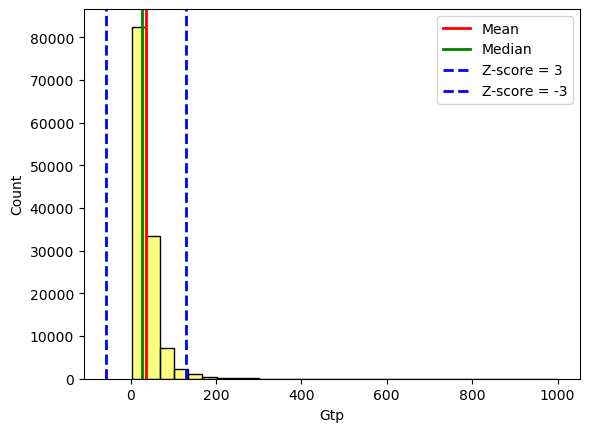

In [38]:
#descriptive statistics of the Gtp feature
gtp_mean = train_df['Gtp'].mean()
gtp_median = train_df['Gtp'].median()
gtp_std = train_df['Gtp'].std()
gtp_min = train_df['Gtp'].min()
gtp_max = train_df['Gtp'].max()
gtp_iqr = train_df['Gtp'].quantile(0.75) - train_df['Gtp'].quantile(0.25)
gtp_skew = train_df['Gtp'].skew()
gtp_kurtosis = train_df['Gtp'].kurtosis() #measure taildness of the distribution
gtp_z_score_pos3 = 3 * gtp_std + gtp_mean
gtp_z_score_neg3 = -3 * gtp_std + gtp_mean

print("Descriptive Statistics for Gtp:  ")
print(f"Mean: {gtp_mean}")
print(f"Median: {gtp_median}")
print(f"Standard Deviation: {gtp_std}")
print(f"Minimum Value: {gtp_min}")
print(f"Maximum Value: {gtp_max}")
print(f"IQR: {gtp_iqr}")
print(f"Skewness: {gtp_skew}")
print(f"Kurtosis: {gtp_kurtosis}")
print(f"Z-score for 3 std above mean: {gtp_z_score_pos3}")
print(f"Z-score for 3 std below mean: {gtp_z_score_neg3}")


#histogram of Gtp feature without the target
sns.histplot(train_df['Gtp'], bins=30, alpha=0.5, color="yellow")
plt.xlabel('Gtp')
plt.ylabel('Count')
plt.axvline(gtp_mean, c='red', ls='-', lw=2)
plt.axvline(gtp_median, c='green', ls='-', lw=2)
plt.axvline(gtp_z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(gtp_z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

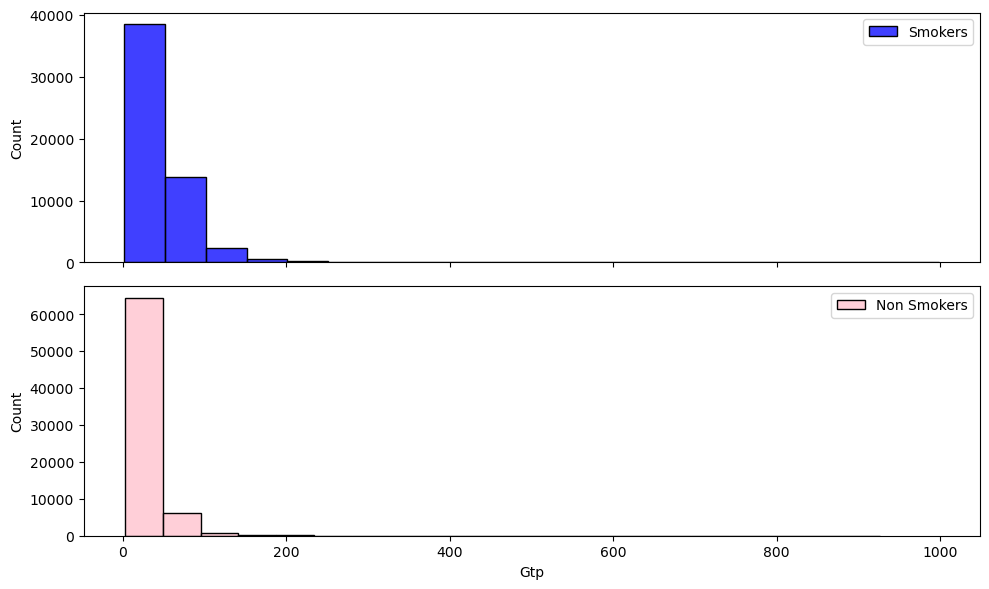

In [39]:


#histogram of Gtp feature with the target
gtp_smokers = train_df[train_df['smoking'] == 1]['Gtp']
gtp_nonsmokers = train_df[train_df['smoking'] == 0]['Gtp']

# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout()
plt.show()


# **Feature Engineering**

## **Feature Scaling**

In [44]:
#function for applying all transformations on the features
def transform_features(feature_name):
    feature = train_df[feature_name].to_numpy()
    #print(type(feature))
    #print(feature)

    # original data
    sns.histplot(feature, bins=30, alpha=0.5, color="red")
    plt.xlabel('Original Data')
    plt.ylabel('Frequency')
    plt.axvline(feature.mean(), c='red', ls='-', lw=2)
    plt.legend(labels=['Mean'])
    plt.title('Histogram of Original Data')
    plt.show()

    fig, axes = plt.subplots(2, 2, figsize=(20, 8))
    # square root transformation of the feature
    sqaure_root_transformed_data = np.sqrt(feature)
    #print(sqaure_root_transformed_data)

    sns.histplot(sqaure_root_transformed_data, bins=30, alpha=0.5, color="yellow",ax=axes[0,0])
    axes[0,0].set_xlabel('Transformed Data')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(sqaure_root_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[0,0].legend(labels=['Mean'])
    axes[0,0].set_title('Histogram of Square Root Transformed Data')

    # log transformation of the feature  
    trf = FunctionTransformer(np.log1p)
    log_transformed_data = trf.fit_transform(train_df[feature_name].to_numpy())
    #print(log_transformed_data)

    sns.histplot(log_transformed_data, bins=30, alpha=0.5, color="pink",ax=axes[1,0])
    axes[1,0].set_xlabel('Transformed Data')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].axvline(log_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[1,0].legend(labels=['Mean'])
    axes[1,0].set_title('Histogram of Log Transformed Data')

    # Box-Cox transformation of the feature
    pt = PowerTransformer(method='box-cox')
    box_cox_transformed_data = pt.fit_transform(train_df[feature_name].to_numpy().reshape(-1, 1))
    #print(box_cox_transformed_data)

    sns.histplot(box_cox_transformed_data, bins=30, alpha=0.5, color="green",ax=axes[0,1])
    axes[0,1].set_xlabel('Transformed Data')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].axvline(box_cox_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[0,1].legend(labels=['Mean'])
    axes[0,1].set_title('Histogram of the Box Cox Transformed Data')

    #Yeo-Johnson transformation of the feature
    yt = PowerTransformer(method='yeo-johnson') #variation of box-cox but can handle negative values
    yeo_johnson_transformed_data = yt.fit_transform(train_df[feature_name].to_numpy().reshape(-1, 1))
    #print(yeo_johnson_transformed_data)

    sns.histplot(yeo_johnson_transformed_data, bins=30, alpha=0.5, color="blue", ax=axes[1,1])
    axes[1,1].set_xlabel('Transformed Data')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].axvline(yeo_johnson_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[1,1].legend(labels=['Mean'])
    axes[1,1].set_title('Histogram of Yeo-Johnson Transformed Data')

    plt.tight_layout()
    plt.show()

    return sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data

    

### Feature 1: Hemoglobin
Observations:

1- The original feature was a little bit skewed to the left; although when we applied different tranformations on the feature, we noticed that box-cox transformation lead to the best distribution so we can apply scaling to the feature.A

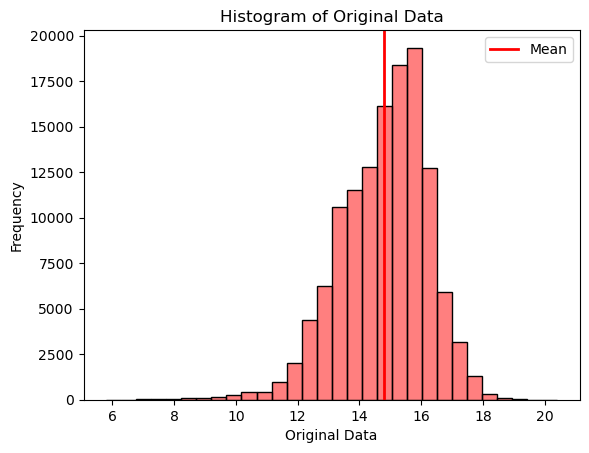

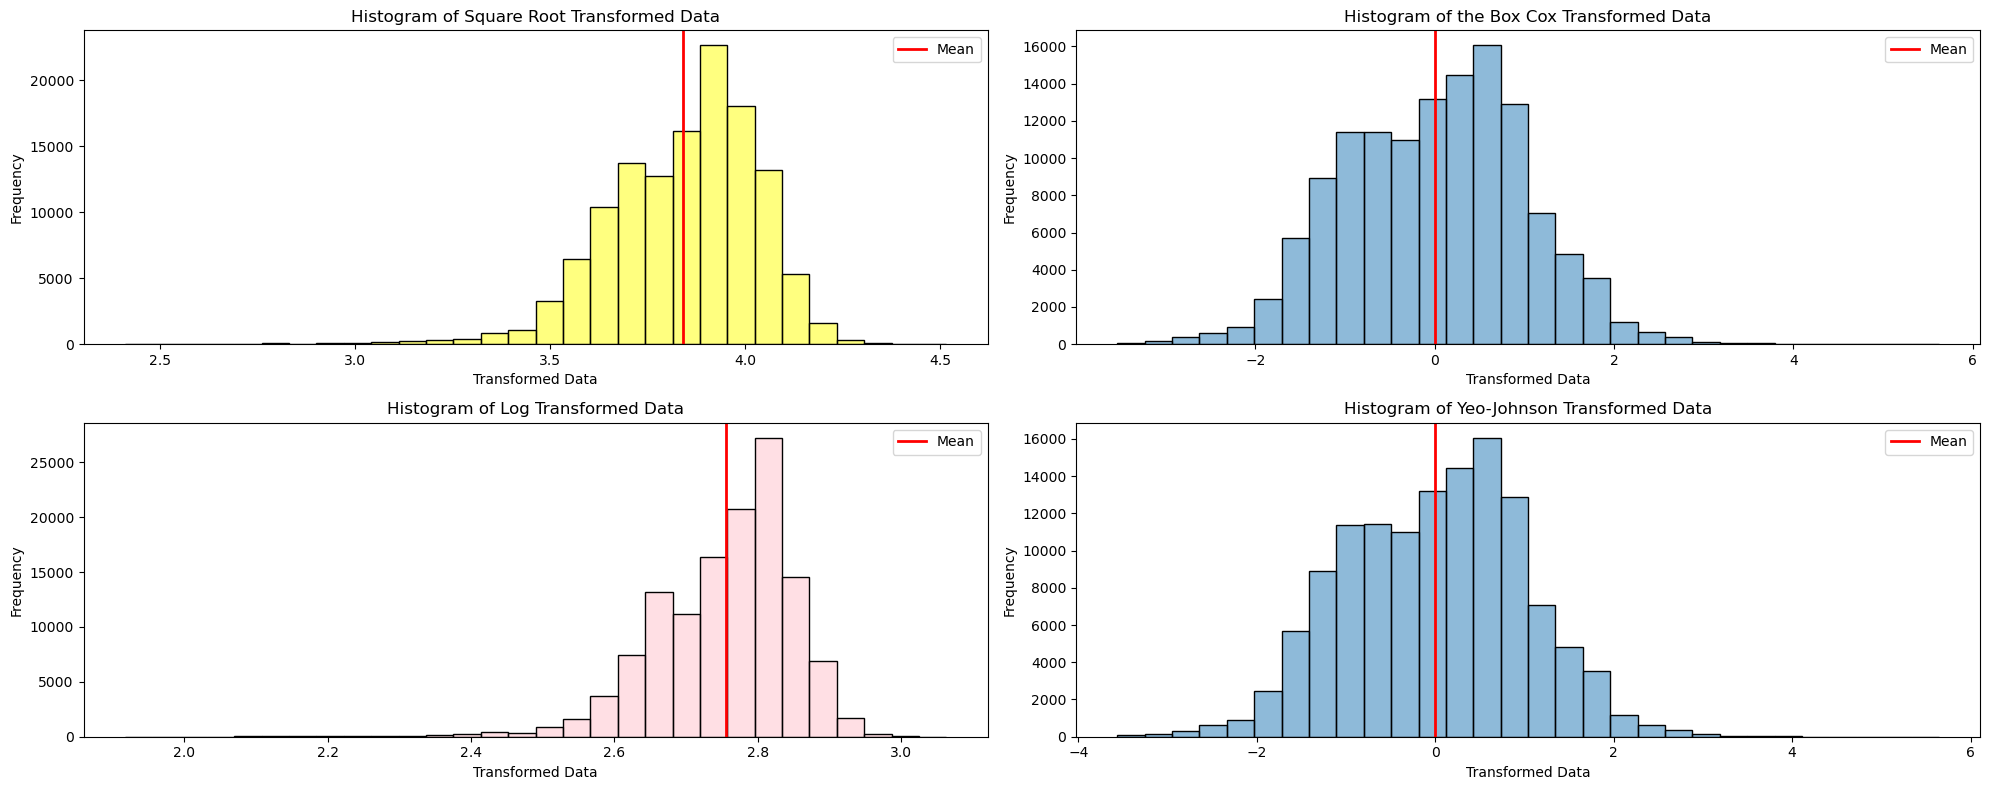

In [45]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('hemoglobin')

#scaling the data using standard scaler
scaler = StandardScaler()
scaler.fit(box_cox_transformed_data)
scaled_hemoglobin_train = scaler.transform(box_cox_transformed_data)
#print(scaled_hemoglobin_train)

# scale validation and test sets
pt = PowerTransformer(method='box-cox')
box_cox_transformed_data_val = pt.fit_transform(val_df['hemoglobin'].to_numpy().reshape(-1, 1))
box_cox_transformed_data_test = pt.fit_transform(test_df['hemoglobin'].to_numpy().reshape(-1, 1))

scaler = StandardScaler()
scaler.fit(box_cox_transformed_data_val)
scaled_hemoglobin_val = scaler.transform(box_cox_transformed_data_val)
#print(scaled_hemoglobin_val)

scaler = StandardScaler()
scaler.fit(box_cox_transformed_data_test)
scaled_hemoglobin_test = scaler.transform(box_cox_transformed_data_test)
#print(scaled_hemoglobin_test)



### feature 4: Fasting Blood Sugar
Observations:

1- In this feature, we applied different transformation on it dure to the skweness it had in the original feature graph; after analyzing the tranformations the box-cox tranformation was used before scaling. 

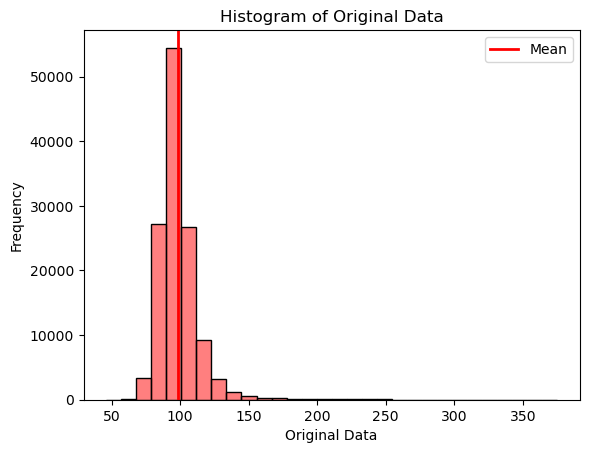

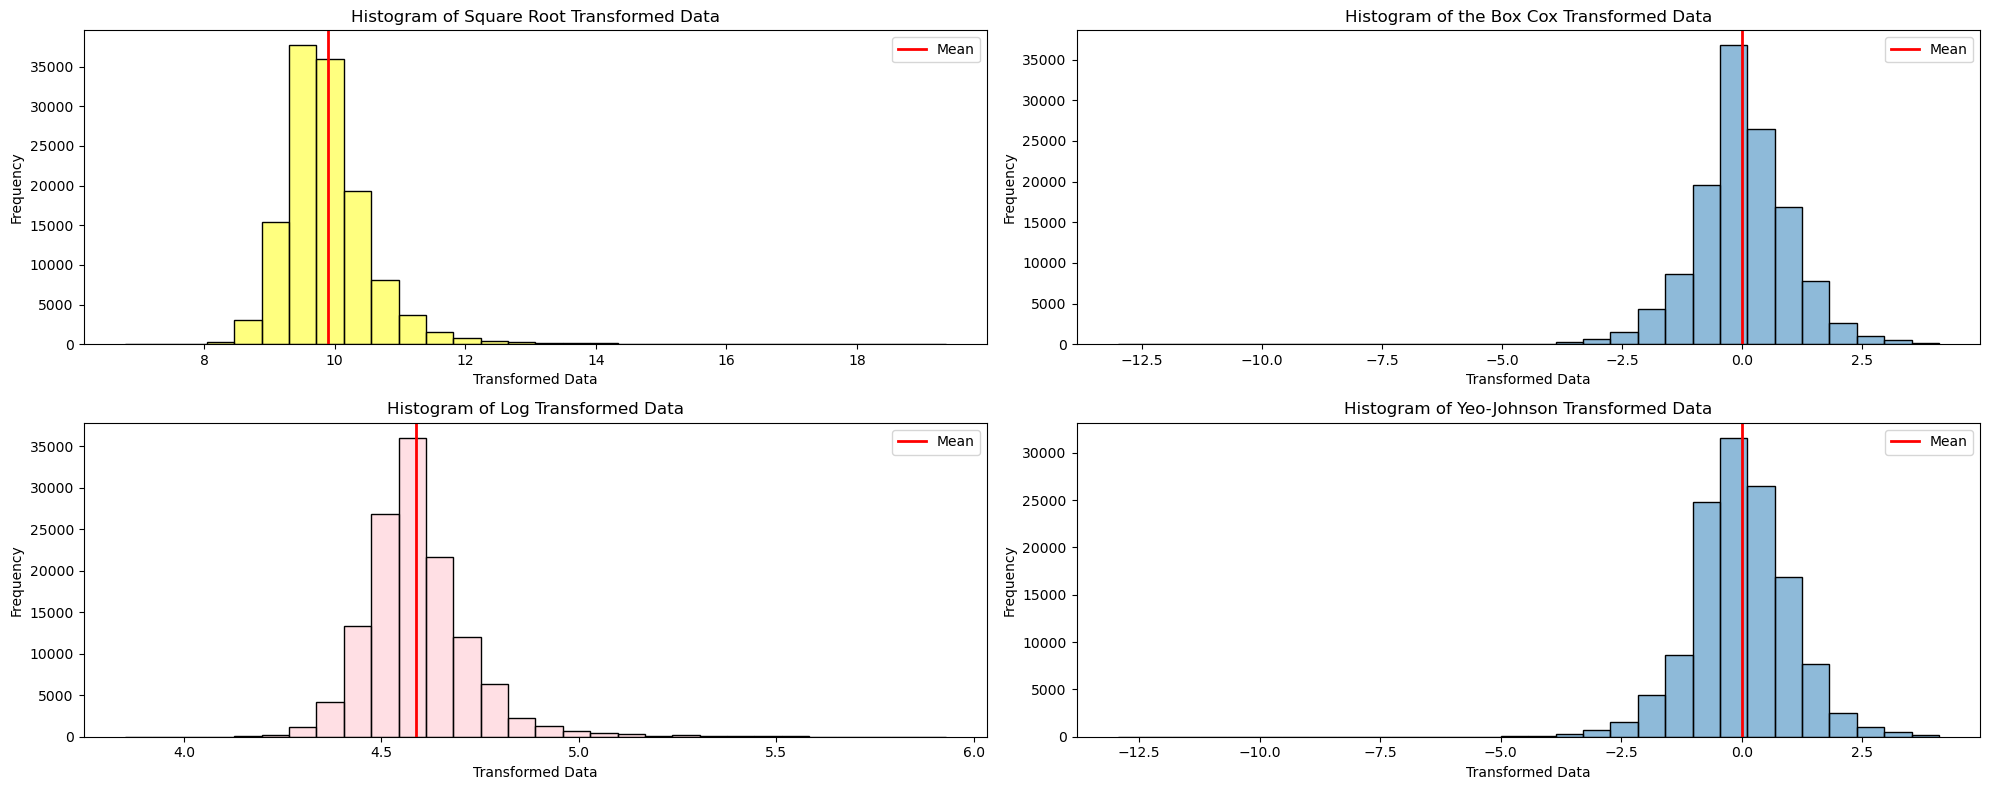

In [47]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('fasting blood sugar')

#scaling the data using standard scaler
scaler = StandardScaler()
scaler.fit(box_cox_transformed_data)
scaled_fasting_blood_sugar_train = scaler.transform(box_cox_transformed_data)
#print(scaled_fasting_blood_sugar_train)

# scale validation and test sets
pt = PowerTransformer(method='box-cox')
box_cox_transformed_data_val = pt.fit_transform(val_df['fasting blood sugar'].to_numpy().reshape(-1, 1))
box_cox_transformed_data_test = pt.fit_transform(test_df['fasting blood sugar'].to_numpy().reshape(-1, 1))

scaler = StandardScaler()
scaler.fit(box_cox_transformed_data_val)
scaled_fasting_blood_sugar_val = scaler.transform(box_cox_transformed_data_val)
#print(scaled_fasting_blood_sugar_val)

scaler = StandardScaler()
scaler.fit(box_cox_transformed_data_test)
scaled_fasting_blood_sugar_test = scaler.transform(box_cox_transformed_data_test)
#print(scaled_fasting_blood_sugar_test)


### Feature 5: LDL
Observations:

1- The transformations didn't add much, so we scale with original data using Standardization

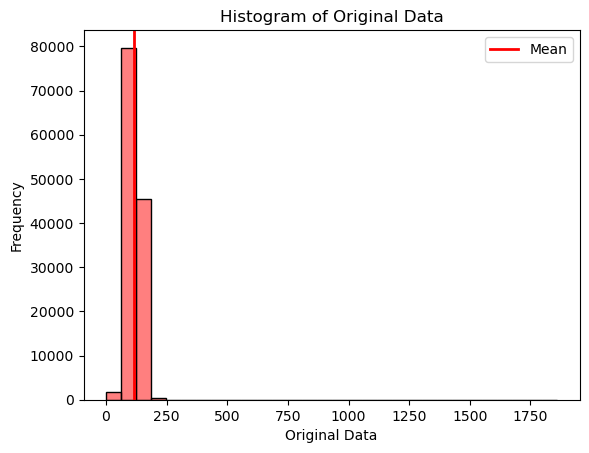

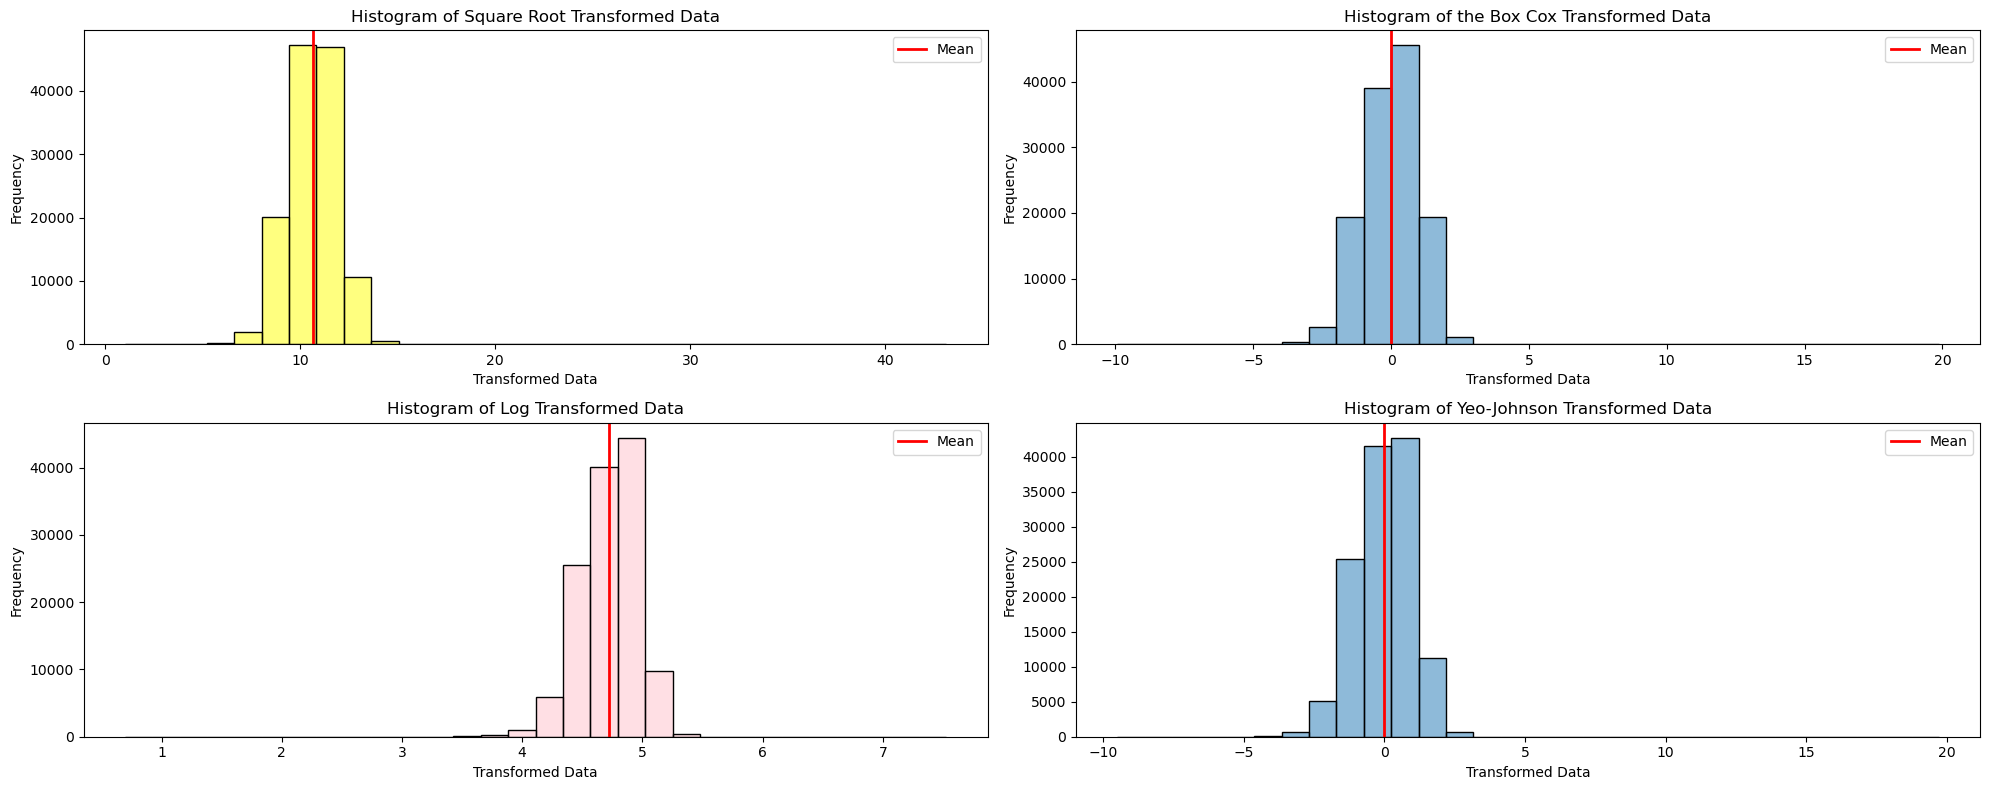

In [48]:
transform_features('LDL')

LDL_feature = train_df['LDL'].to_numpy().reshape(-1, 1)
#scaling the data using standard scaler usnig original data
scaler = StandardScaler()
scaler.fit(LDL_feature)
scaled_LDL_train = scaler.transform(LDL_feature)
#print(scaled_LDL_train)

# scale validation and test sets
LDL_feature_val = val_df['LDL'].to_numpy().reshape(-1, 1)
LDL_feature_test = test_df['LDL'].to_numpy().reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(LDL_feature_val)
scaled_LDL_val = scaler.transform(LDL_feature_val)
#print(scaled_LDL_val)

scaler = StandardScaler()
scaler.fit(LDL_feature_test)
scaled_LDL_test = scaler.transform(LDL_feature_test)
#print(scaled_LDL_test)

### Feature 6: Height
Observations:

1- After analysis was applied, no tranformations were needed and we scaled using MinMax scaler.

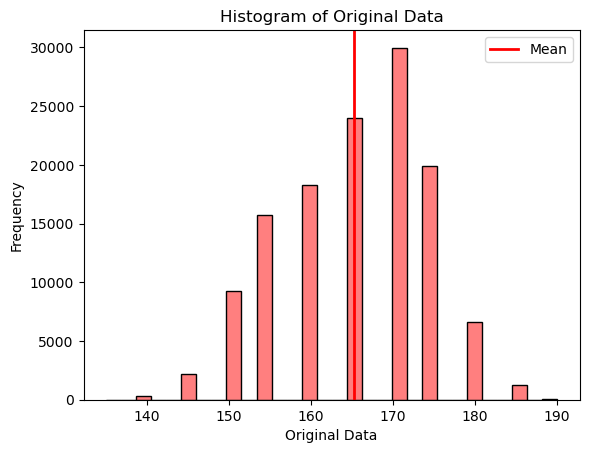

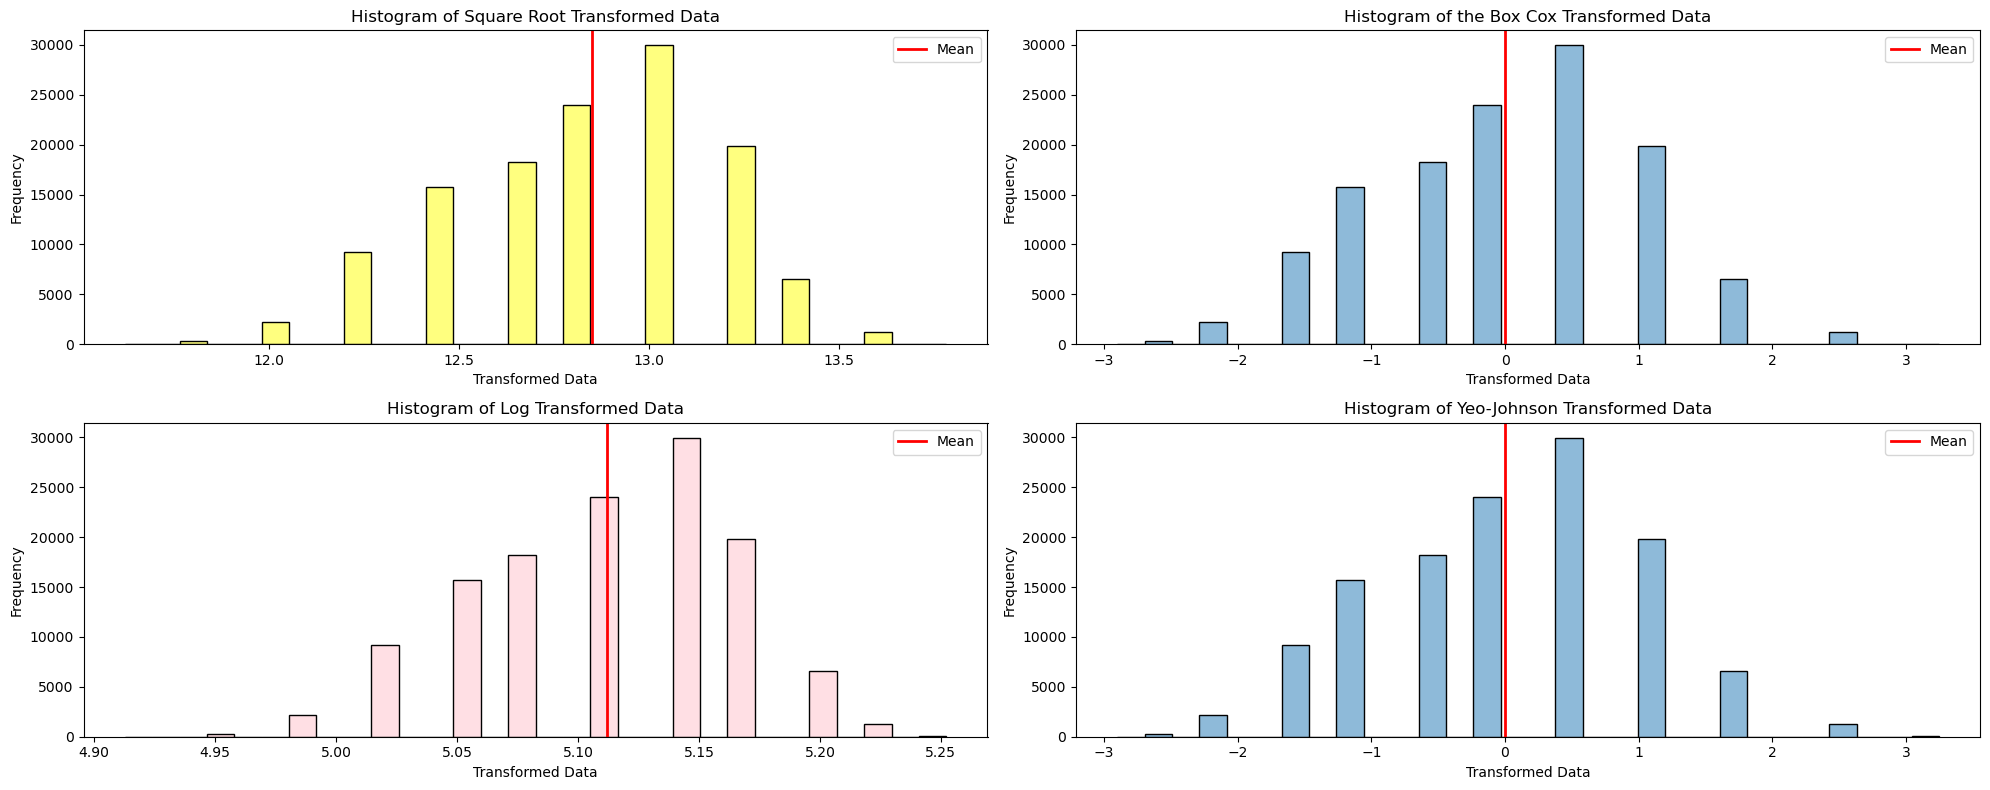

In [49]:
transform_features('height(cm)')

original_feature = train_df['height(cm)'].to_numpy().reshape(-1, 1)

#scaling the data using min-max scaler using original data
scaler = MinMaxScaler()
scaler.fit(original_feature)
scaled_height_train = scaler.transform(original_feature)
#print(scaled_height_train)

#scale validation and test sets
original_feature_val = val_df['height(cm)'].to_numpy().reshape(-1, 1)
original_feature_test = test_df['height(cm)'].to_numpy().reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(original_feature_val)
scaled_height_val = scaler.transform(original_feature_val)
#print(scaled_height_val)

scaler = MinMaxScaler()
scaler.fit(original_feature_test)
scaled_height_test = scaler.transform(original_feature_test)
#print(scaled_height_test)


### Feature 7: Weight

Observations:

1- The data of that feature didn't need tranformtions it just have a little bit of skewness. Therefore, we scaled the data using robust scaler because it is somewhat robust to skewness. 

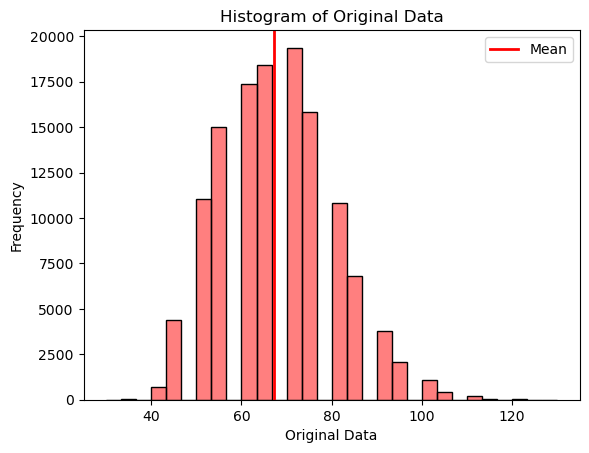

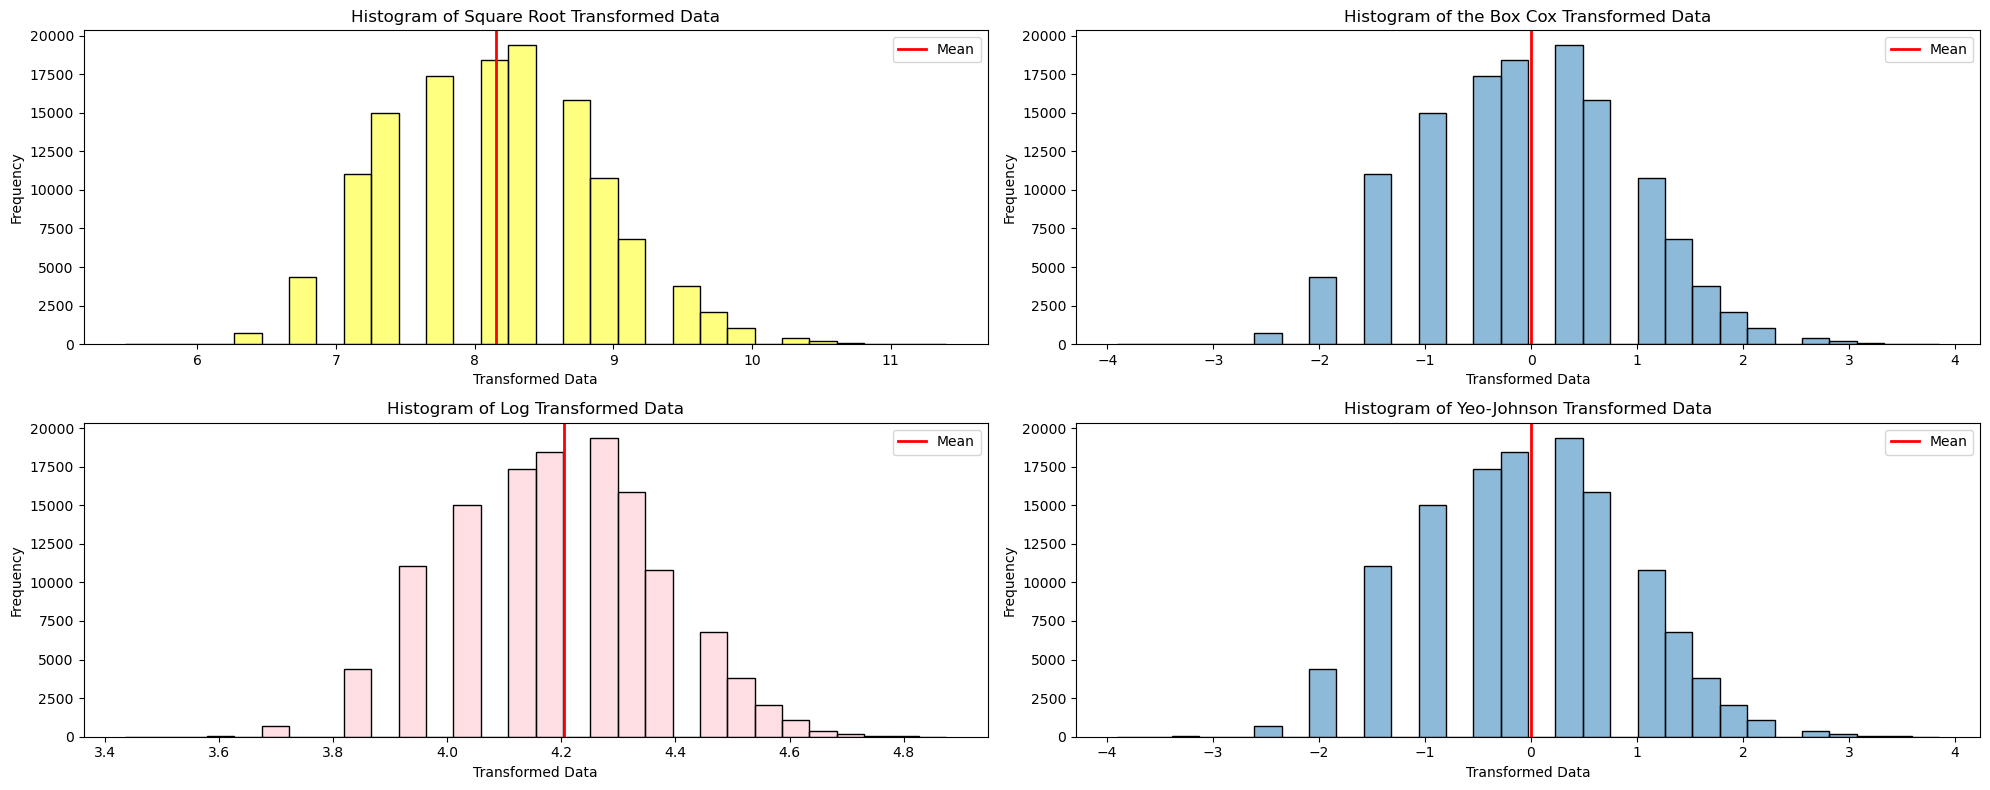

In [51]:
transform_features('weight(kg)')

original_data = train_df['weight(kg)'].to_numpy().reshape(-1, 1)
#scaling the data using robust scaler beacause it is robust to outliers and can handle them
scaler = RobustScaler()
scaler.fit(original_data)
scaled_weight = scaler.transform(original_data)
#print(scaled_weight)

#scale validation and test sets
original_data_val = val_df['weight(kg)'].to_numpy().reshape(-1, 1)
original_data_test = test_df['weight(kg)'].to_numpy().reshape(-1, 1)

scaler = RobustScaler()
scaler.fit(original_data_val)
scaled_weight_val = scaler.transform(original_data_val)
#print(scaled_weight_val)

scaler = RobustScaler()
scaler.fit(original_data_test)
scaled_weight_test = scaler.transform(original_data_test)
#print(scaled_weight_test)


### Feature 9: Serum Creatinine

Observations:

1- After taking tranformations of different types, we figured out that log-tranformation is the best distributed in this feature.

2- We used MinMaxScaler because the data wasn't clear gaussian.

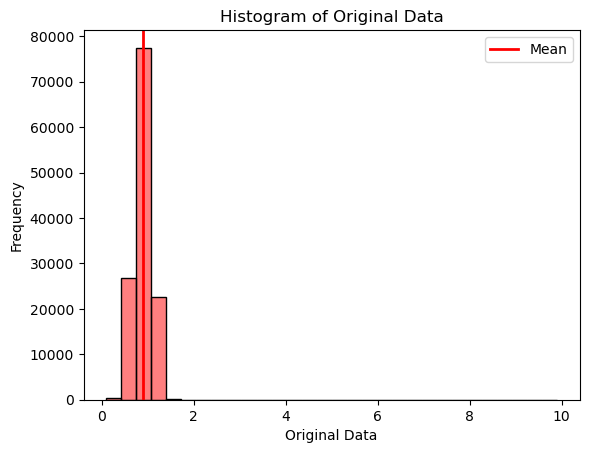

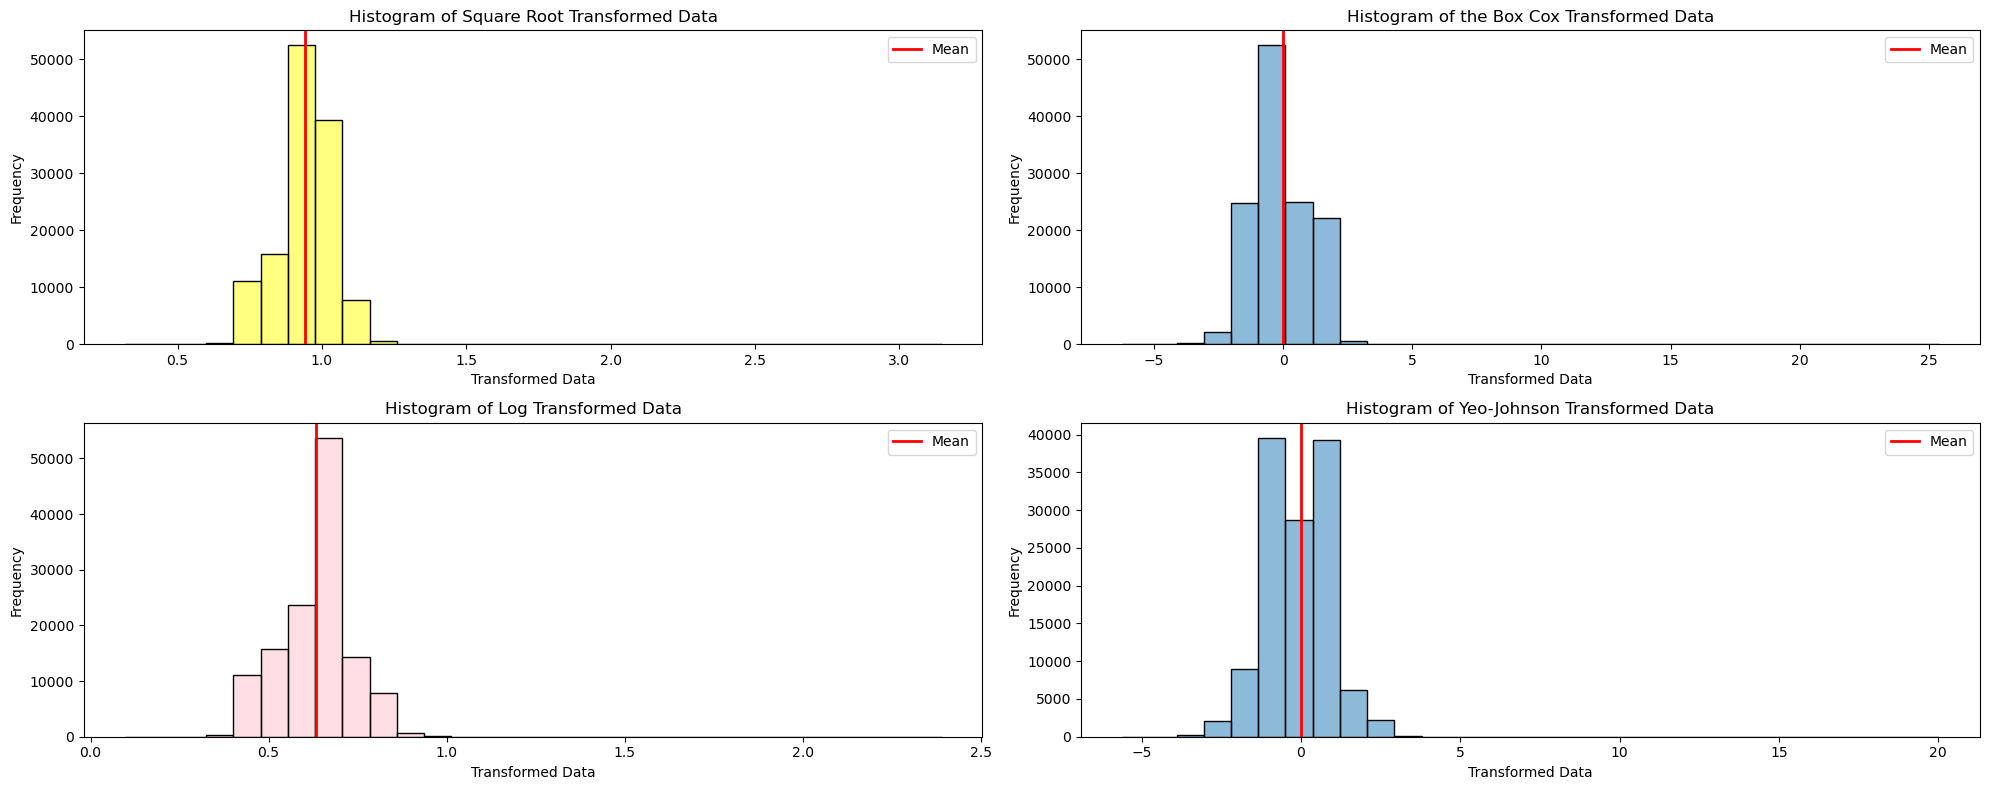

In [53]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('serum creatinine')

log_transformed_data = log_transformed_data.reshape(-1, 1)
#scaling the data using min-max scaler
scaler = MinMaxScaler()
scaler.fit(log_transformed_data)
scaled_serum_creatinine = scaler.transform(log_transformed_data)
#print(scaled_serum_creatinine)

#scale validation and test sets
trf = FunctionTransformer(np.log1p)
log_transformed_data_val = trf.fit_transform(val_df['serum creatinine'].to_numpy())

log_transformed_data_val = log_transformed_data_val.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(log_transformed_data_val)
scaled_serum_creatinine_val = scaler.transform(log_transformed_data_val)
#print(scaled_serum_creatinine_val)

trf = FunctionTransformer(np.log1p)
log_transformed_data_test = trf.fit_transform(test_df['serum creatinine'].to_numpy())

log_transformed_data_test = log_transformed_data_test.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(log_transformed_data_test)
scaled_serum_creatinine_test = scaler.transform(log_transformed_data_test)
#print(scaled_serum_creatinine_test)

### Feature 10: Gtp

Observations:

1- As seen in the original feature graph, the data was highly skewed. Therefore, we applied different tranformations and box-cox was the best of them.

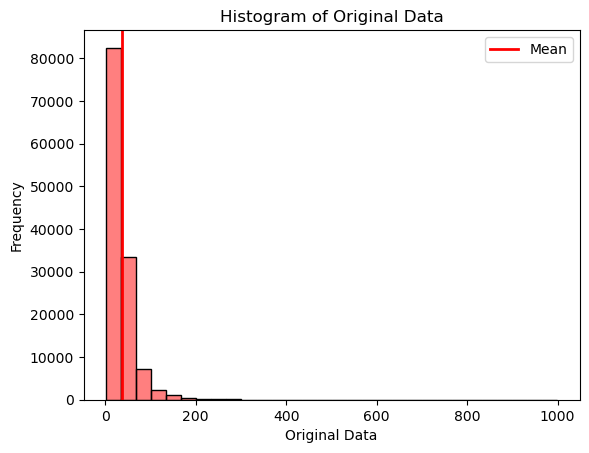

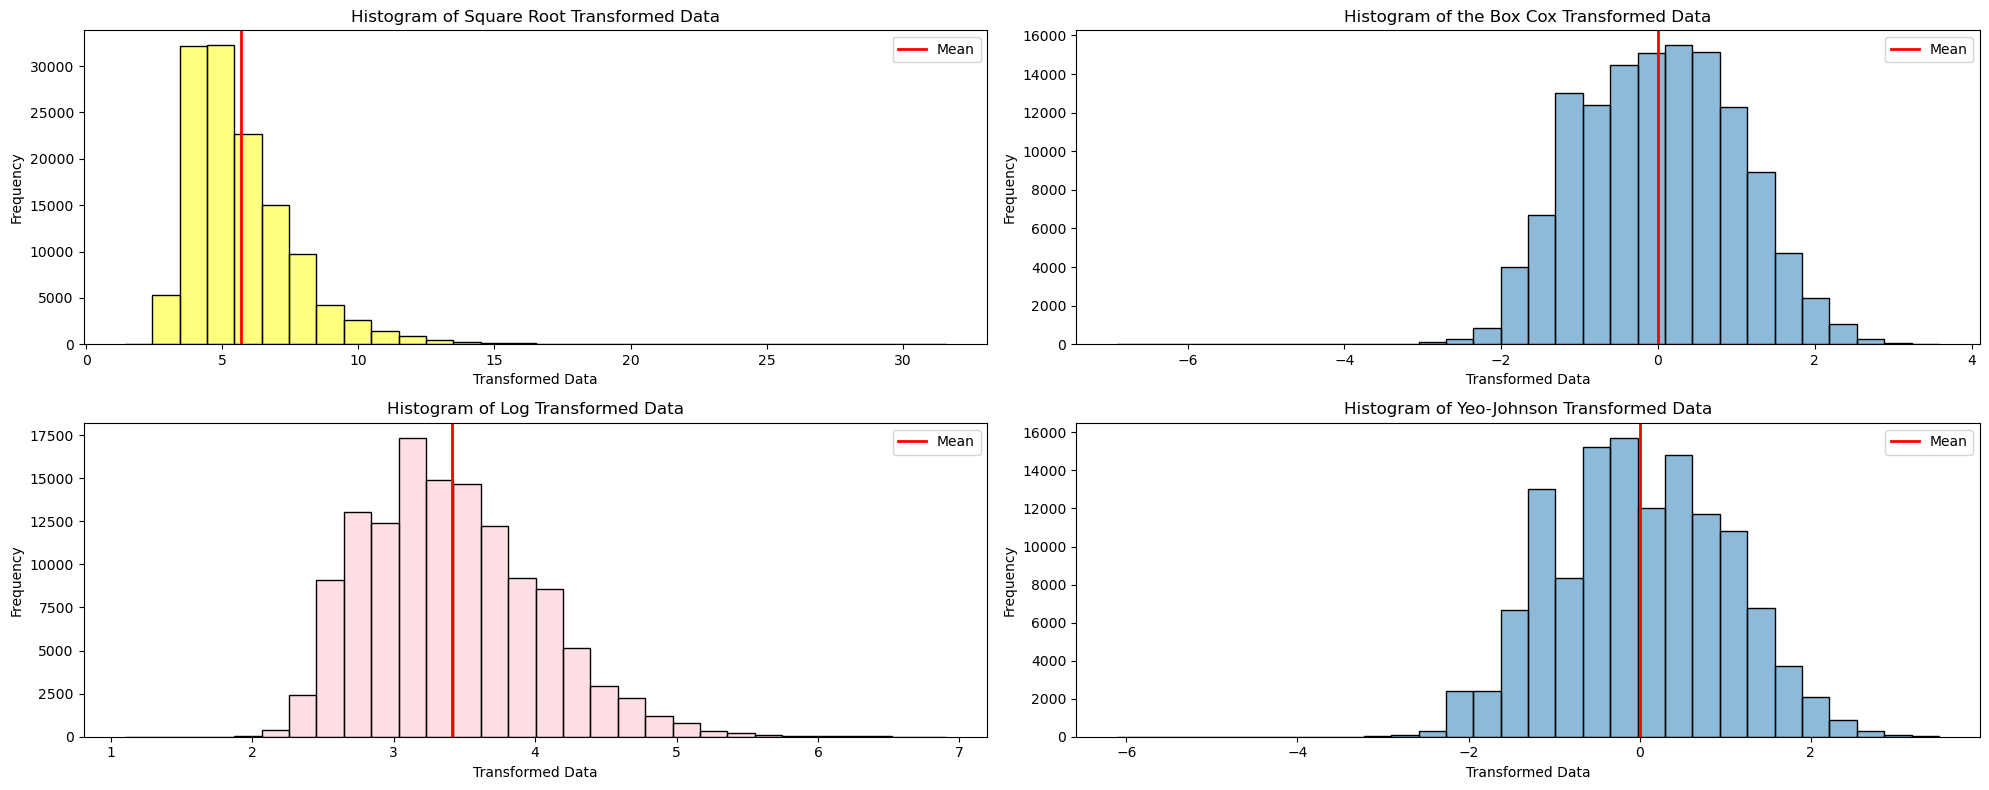

In [54]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('Gtp')

#scaling the data using standard scaler
scaler = StandardScaler()
scaler.fit(box_cox_transformed_data)
scaled_Gtp = scaler.transform(box_cox_transformed_data)
#print(scaled_Gtp)

#scale validation and test sets
pt = PowerTransformer(method='box-cox')
box_cox_transformed_data_val = pt.fit_transform(val_df['Gtp'].to_numpy().reshape(-1, 1))
box_cox_transformed_data_test = pt.fit_transform(test_df['Gtp'].to_numpy().reshape(-1, 1))

scaler = StandardScaler()
scaler.fit(box_cox_transformed_data_val)
scaled_Gtp_val = scaler.transform(box_cox_transformed_data_val)
#print(scaled_Gtp_val)

scaler = StandardScaler()
scaler.fit(box_cox_transformed_data_test)
scaled_Gtp_test = scaler.transform(box_cox_transformed_data_test)
#print(scaled_Gtp_test)

## **Bivariate, Multivariate analysis, and dropped features** 



Two main graphs help us quickly asses the strength of each feature in predicting the target

<Axes: >

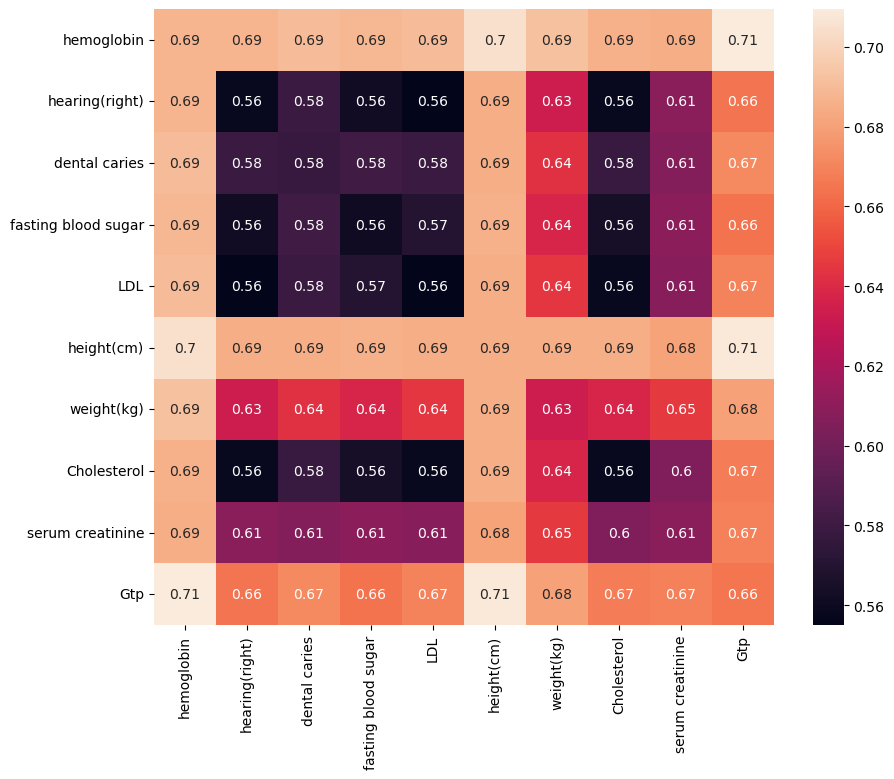

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

train_df = pd.read_csv('train_data.csv')
logistic_df = train_df.copy()

#Preprocessing
logistic_df['hemoglobin'] = (logistic_df['hemoglobin'] - logistic_df['hemoglobin'].mean()) / logistic_df['hemoglobin'].std()
logistic_df['hearing(right)'] = logistic_df['hearing(right)'] - 1
logistic_df['fasting blood sugar'] = (logistic_df['fasting blood sugar'] - logistic_df['fasting blood sugar'].mean()) / logistic_df['fasting blood sugar'].std()
logistic_df['LDL'] = (logistic_df['LDL'] - logistic_df['LDL'].mean()) / logistic_df['LDL'].std()
logistic_df['height(cm)'] = (logistic_df['height(cm)'] - logistic_df['height(cm)'].mean()) / logistic_df['height(cm)'].std()
logistic_df['weight(kg)'] = (logistic_df['weight(kg)'] - logistic_df['weight(kg)'].mean()) / logistic_df['weight(kg)'].std()
logistic_df['Cholesterol'] = (logistic_df['Cholesterol'] - logistic_df['Cholesterol'].mean()) / logistic_df['Cholesterol'].std()
logistic_df['serum creatinine'] = (logistic_df['serum creatinine'] - logistic_df['serum creatinine'].mean()) / logistic_df['serum creatinine'].std()
logistic_df['Gtp'] = (logistic_df['Gtp'] - logistic_df['Gtp'].mean()) / logistic_df['Gtp'].std()

 

#Performing Logistic Regression On every pair

features = ['hemoglobin','hearing(right)','dental caries','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']
matrix = np.zeros((len(features), len(features)))

for i in range(0,len(features)):
    for j in range(0, len(features)):
        if j >= i:
            logreg = LogisticRegression()
            logreg.fit(logistic_df[[features[i], features[j]]], logistic_df["smoking"])
            matrix[i][j] = accuracy_score(logistic_df["smoking"], logreg.predict(logistic_df[[features[i], features[j]]]))
        else:
            matrix[i][j] = matrix[j][i]


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, xticklabels=features, yticklabels=features)

Logistic Regression Accuracy: 72.86%


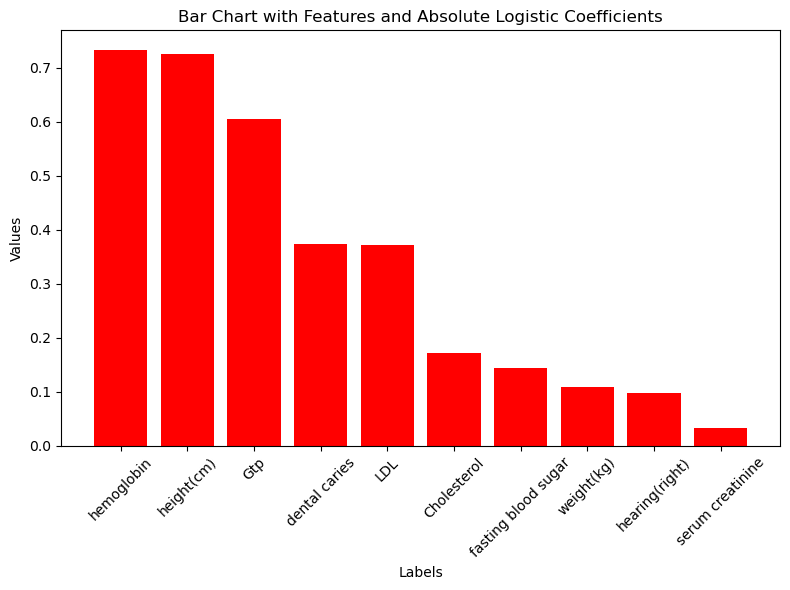

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

normalized_df = logistic_df.copy()

features = ['hemoglobin','hearing(right)','dental caries','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']
logreg = LogisticRegression()
logreg.fit(normalized_df.drop(columns=["smoking","Unnamed: 0"]), normalized_df["smoking"])
accuracy = accuracy_score(normalized_df["smoking"], logreg.predict(normalized_df.drop(columns=["smoking","Unnamed: 0"])))

print(f"Logistic Regression Accuracy: {round(accuracy*100,2)}%")


feature_coeff = list(zip(features,logreg.coef_.tolist()[0]))
feature_coeff = sorted(feature_coeff, key=lambda x: -abs(x[1]))

sorted_features = list(zip(*feature_coeff))[0]
sorted_coeff = list(zip(*feature_coeff))[1]


plt.figure(figsize=(8, 6))
plt.bar(sorted_features, [abs(i) for i in sorted_coeff], color='red')
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Bar Chart with Features and Absolute Logistic Coefficients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h3>Hearing (Right) </h3>

The phi correlation - which is used to measure correlation between categorical values-  between hearing and smoking is very low.


<Axes: >

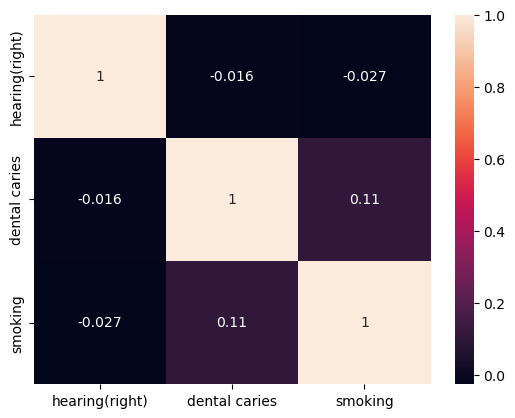

In [70]:
from sklearn.metrics import matthews_corrcoef

categorical_correlation_df = pd.DataFrame()


categorical_features_target = ["hearing(right)","dental caries","smoking"]

#Transform from 1/0 to 1/-1 to use mathe's coefficient
categorical_correlation_df["smoking"] = 2*train_df["smoking"] - 1
categorical_correlation_df["dental caries"] = 2*train_df["dental caries"] - 1
categorical_correlation_df["hearing(right)"] = 2*train_df["hearing(right)"] - 3

categ_correlation_matrix = np.zeros((3,3))

for i in range(3):
    for j in range(3):
        categ_correlation_matrix[i][j] = matthews_corrcoef(categorical_correlation_df[categorical_features_target[i]], categorical_correlation_df[categorical_features_target[j]])

sns.heatmap(categ_correlation_matrix, annot=True, xticklabels=categorical_features_target, yticklabels=categorical_features_target)



<h3>Cholestrol</h3>

1- The correlation between Cholestrol and LDL is very high, suggesting that one of the features might be removed without causing much loss of information.

2- To choose between the two, we use the point biseral correlation, which measures the correlation between a continuous variable and a binary one

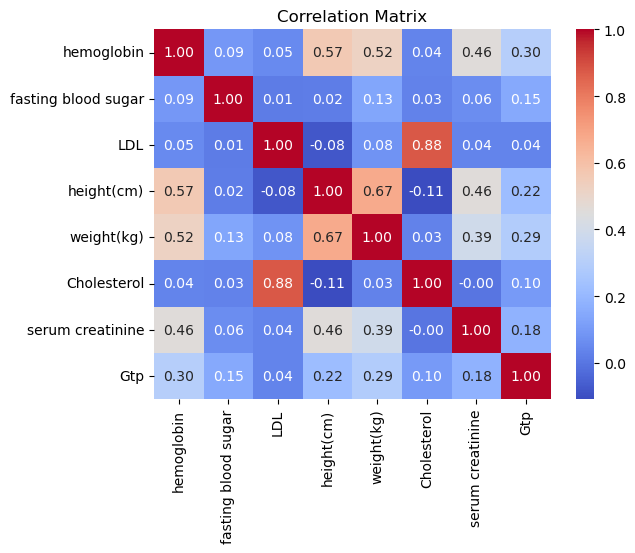

In [71]:
continuous_features = train_df.drop(columns = ['Unnamed: 0', 'hearing(right)', 'dental caries', 'smoking'])

# Visualize the correlation matrix using Seaborn's heatmap
sns.heatmap(continuous_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

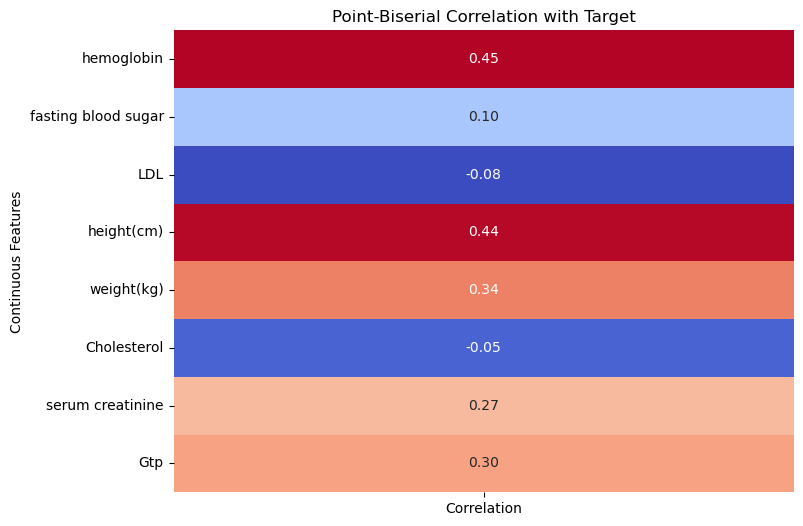

In [72]:
import scipy.stats as stats

continuous_features = ['hemoglobin','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']  # Add more features as needed
target_variable = 'smoking'  

correlation_values = []

for feature in continuous_features:
    corr, p_value = stats.pointbiserialr(train_df[target_variable], train_df[feature])
    correlation_values.append(corr)

# Create a DataFrame with correlation values
correlation_df = pd.DataFrame(data=correlation_values, index=continuous_features, columns=['Correlation'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Point-Biserial Correlation with Target')
plt.ylabel('Continuous Features')
plt.show()